# Статистика по кинологам, кинологическим расчетам и группам подготовки

[1. Количество зарегестрированных кинологических расчетов (по специализациям)](#title1)

[2. Статус аттестации кинологических расчетов](#title2)

[2.1 Статус аттестации кинологических расчетов (ПСС)](#title3)

[2.2 Статус аттестации кинологических расчетов (ПТП)](#title4)

[2.3 Статус аттестации кинологических расчетов (След)](#title5)

[3. Статистика по группам подготовки](#title6)

[3.1 Количество групп подготовки по различным специализациям](#title7)

[3.2 Количество выездов в группах по различным специализациям](#title8)
    
[3.3 Количество выезжающих кинологов в группах подготовки](#title9)
    
[3.4 Статус аттестации в группах подготовки](#title10)

## Список сокращений


**КР** - Кинологический расчет

**ПСС** - Поисково-спасательная служба

**ПСР** - Поисково-спасательные работы

**ПТП** - Поиск тел погибших


In [1]:
import gspread

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib.colors import ListedColormap

import textwrap


import plotly

import plotly.graph_objs as go

import plotly.express as px

from plotly.subplots import make_subplots




%matplotlib inline

from gspread_dataframe import get_as_dataframe, set_with_dataframe

from gspread_formatting.dataframe import format_with_dataframe


In [2]:
#сервисный аккаунт гугл
gc = gspread.service_account(filename = 'Here_is_your_service_account_Google.json')

#открываем гугл таблицу по ключу
sh = gc.open_by_key('Here_is_Google_sheet_key') 

#оборачиваем гугл-таблицу в датафрейм Пандас
df = get_as_dataframe(sh.worksheet('Here_is_sheet_name'), parse_dates=True) 

#выбираем необходимые для работы строки и столбцы по индексу
df = df.iloc[0:532, 0:7] 



In [3]:
df.head()

,Фамилия,Имя,Отчество,Регион,Специализация,Допуск,Группа подготовки
0,Абдрахимова,Алина,Ринатовна,Москва и МО,ПСС,Расчет не проверен,"ПСКО ""ПУЛЬС"""
1,Абрамочкина,Оксана,Валериевна,Москва и МО,ПСС,Расчет не проверен,Кинологический поисковый отряд 2-К
2,Авдалян,Евгения,Михайловна,Москва и МО,ПСС,Расчет не проверен,Самоподготовка
3,Авдеева,Евгения,Валерьевна,Москва и МО,ПСС,Расчет не проверен,"ПКГ ""Север"""
4,Адилова,Татьяна,Дмитриевна,Пермский,След,Расчет не проверен,"ПРОО ""Поисково-спасательный отряд"""


In [4]:
#убираем пробелы в конце строк

df['Имя'] = df['Имя'].replace(r'\s+','',regex=True)

df['Фамилия'] = df['Фамилия'].replace(r'\s+','',regex=True)

df.head()

,Фамилия,Имя,Отчество,Регион,Специализация,Допуск,Группа подготовки
0,Абдрахимова,Алина,Ринатовна,Москва и МО,ПСС,Расчет не проверен,"ПСКО ""ПУЛЬС"""
1,Абрамочкина,Оксана,Валериевна,Москва и МО,ПСС,Расчет не проверен,Кинологический поисковый отряд 2-К
2,Авдалян,Евгения,Михайловна,Москва и МО,ПСС,Расчет не проверен,Самоподготовка
3,Авдеева,Евгения,Валерьевна,Москва и МО,ПСС,Расчет не проверен,"ПКГ ""Север"""
4,Адилова,Татьяна,Дмитриевна,Пермский,След,Расчет не проверен,"ПРОО ""Поисково-спасательный отряд"""


In [5]:
df['Проводник'] = df['Имя'] + str(' ') + df['Фамилия']



In [6]:
df_kinologist = df[['Проводник', 'Регион', 'Специализация', 'Допуск', 'Группа подготовки']].copy()

df_kinologist.head()

,Проводник,Регион,Специализация,Допуск,Группа подготовки
0,Алина Абдрахимова,Москва и МО,ПСС,Расчет не проверен,"ПСКО ""ПУЛЬС"""
1,Оксана Абрамочкина,Москва и МО,ПСС,Расчет не проверен,Кинологический поисковый отряд 2-К
2,Евгения Авдалян,Москва и МО,ПСС,Расчет не проверен,Самоподготовка
3,Евгения Авдеева,Москва и МО,ПСС,Расчет не проверен,"ПКГ ""Север"""
4,Татьяна Адилова,Пермский,След,Расчет не проверен,"ПРОО ""Поисково-спасательный отряд"""


In [7]:
#рассматриваем только Московский регион

df_kinologist_msc = df_kinologist[df_kinologist['Регион'] == 'Москва и МО'].copy()

df_kinologist_msc

,Проводник,Регион,Специализация,Допуск,Группа подготовки
0,Алина Абдрахимова,Москва и МО,ПСС,Расчет не проверен,"ПСКО ""ПУЛЬС"""
1,Оксана Абрамочкина,Москва и МО,ПСС,Расчет не проверен,Кинологический поисковый отряд 2-К
2,Евгения Авдалян,Москва и МО,ПСС,Расчет не проверен,Самоподготовка
3,Евгения Авдеева,Москва и МО,ПСС,Расчет не проверен,"ПКГ ""Север"""
8,Елизавета Аксенова,Москва и МО,ПСС,Расчет не проверен,DogDrive
...,...,...,...,...,...
522,Каролина Элисс,Москва и МО,ПСС,Тестирование: Допущен в усиление,"КОД ""Амулет"""
523,Олеся Юрковская,Москва и МО,ПСС,Тестирование: Допущен в усиление,Кинологический поисковый отряд 2-К
524,Олеся Юрковская,Москва и МО,ПТП,Расчет не проверен,Кинологический поисковый отряд 2-К
526,Надежда Ягова,Москва и МО,ПСС,Тестирование: Допущен в усиление,Квант


In [8]:
df_kinologist_msc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 528
Data columns (total 5 columns):
Проводник            214 non-null object
Регион               214 non-null object
Специализация        214 non-null object
Допуск               214 non-null object
Группа подготовки    213 non-null object
dtypes: object(5)
memory usage: 10.0+ KB


## <a id="title1">1. Количество зарегестрированных кинологических расчетов (по специализациям)</a>

In [9]:
df_kinologist_msc_spec = df_kinologist_msc.groupby('Специализация').agg({'Проводник':'count'})\
.rename(columns = {'Проводник':'Количество КР'}).reset_index()

df_kinologist_msc_spec

,Специализация,Количество КР
0,ПСС,163
1,ПТП,35
2,След,16


In [10]:
df_kinologist_msc_spec_sum = df_kinologist_msc_spec['Количество КР'].sum()

In [11]:
#функция для аннотирования столбцов диаграммы

def autolabel(rects, labels=None, height_factor=1.01): 
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', weight = 'bold', color = 'black', va='bottom')
        
def percent_func_v(plot, sum_v):
    for p in plot.patches:
        _x = p. get_x () + p. get_width ()*0.45
        _y = p. get_height ()*0.5
        value = '{:.0f}% '. format (p. get_height ()*100/sum_v)
        ax.text (_x, _y, value, ha="left", weight = 'bold', color = 'black')
        
        


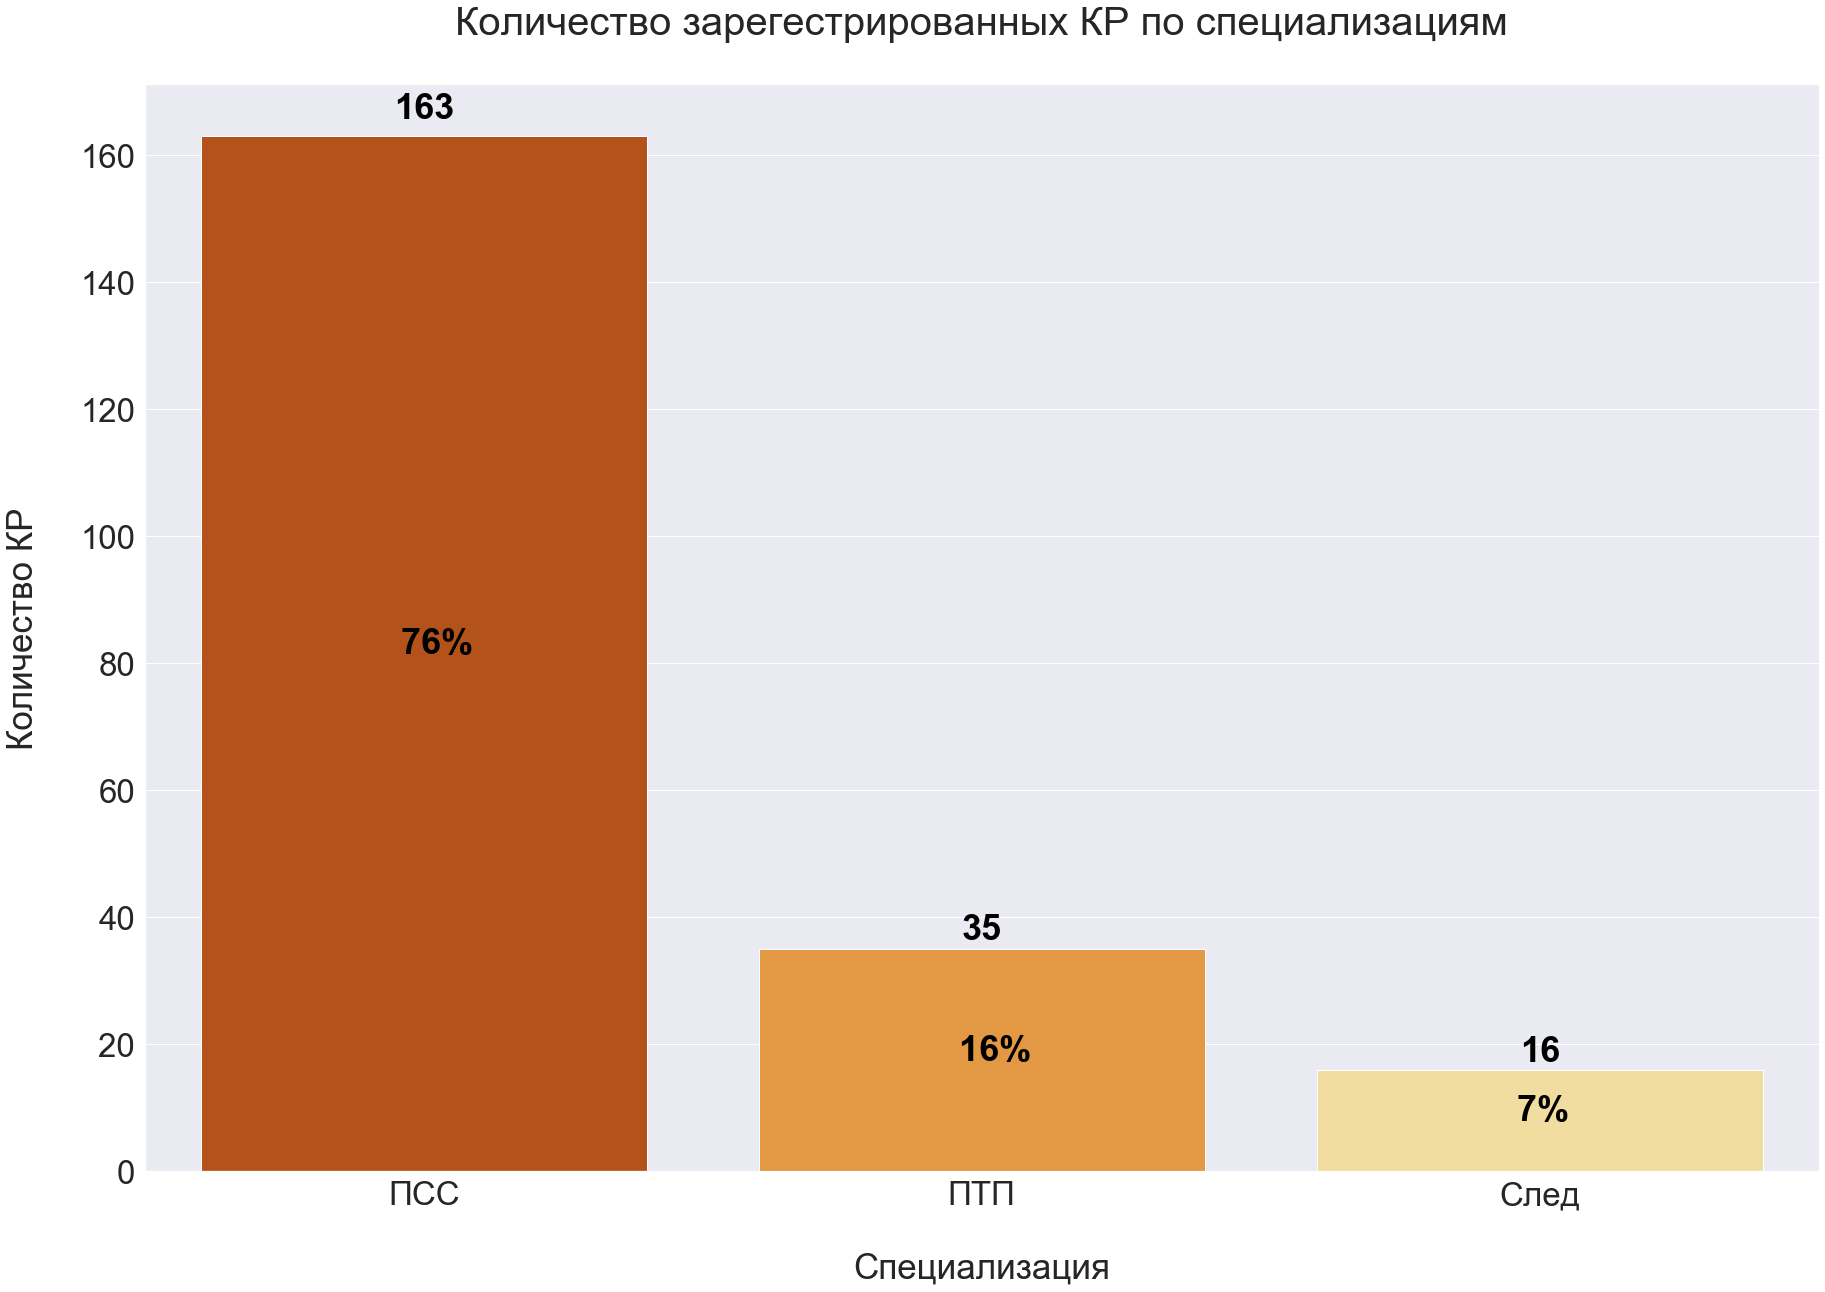

In [12]:
#размер области построения диаграммы
plt.figure(figsize=(30, 20)) 

#увеличиваем размер шрифта надписей на диаграмме
sns.set(font_scale = 3)  

#построение диаграммы
bars = sns.barplot(x ='Специализация', y = 'Количество КР', palette = 'YlOrBr_r', data = df_kinologist_msc_spec) 

ax = plt.gca()

#аннотирование столбцов диаграммы
autolabel(ax.patches, df_kinologist_msc_spec['Количество КР'], height_factor=1.01) 

percent_func_v(bars, df_kinologist_msc_spec_sum) 

#название диаграммы
bars.axes.set_title('Количество зарегестрированных КР по специализациям', fontsize=40, y = 1.04) 

bars.set_xlabel('Специализация', fontsize=35, labelpad = 40) #название оси Х

bars.set_ylabel('Количество КР', fontsize=35, labelpad = 40) #название оси Y

plt.xticks(rotation=0) #поворот значений по оси Х

plt.show() #показываем диаграмму 

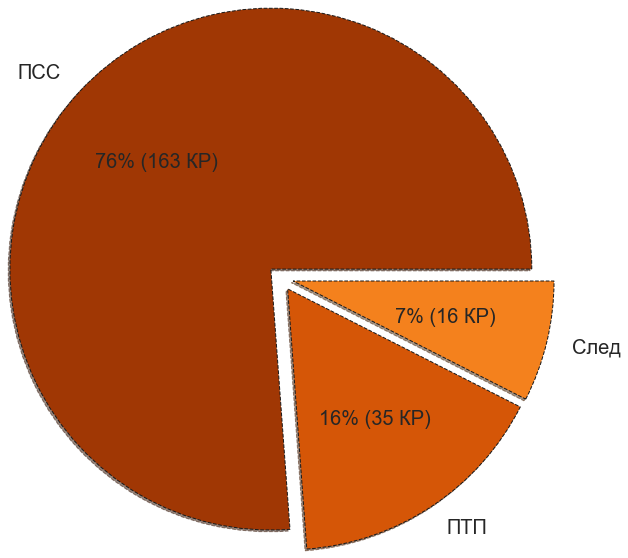

In [13]:
#суммарные значения выездов КР по специализации
values_spec = df_kinologist_msc_spec['Количество КР']

labels = ['ПСС','ПТП', 'След'] #соответствующие лейблы

colors = sns.color_palette('YlOrBr_r')[ 0:3 ] #цвет областей диаграммы

explode = (0.15, 0.15, 0.15) #величина зазоров между секторами

fig, ax = plt.subplots() 

def func(pct, allvals):
    absolute = round(pct/100*np.sum(allvals))
    return "{:.0f}% ({:.0f} КР)".format(pct, absolute)


#построение круговой диаграммы процентного соотношения выездов КР 
#по специализации от общего количества выездов КР

ax.pie(values_spec, labels = labels, autopct=lambda pct: func(pct, values_spec),  colors = colors, 
       shadow = True, radius = 3, explode = explode, 
       wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, textprops =  dict(size=20))

plt.show()
#fig.savefig('df_region_spec.png', dpi = 600)

На конец 2023 года в Московском регионе зарегистрировано 214 кинологических расчета (далее - КР). Из них:

•	ПСС – 163 КР (76 %);

•	ПТП – 35 КР (16 %);

•	След – 16 КР (7 %). 


## <a id="title2">2. Статус аттестации кинологических расчетов</a>

In [14]:
df_kinologist_att_msc = df_kinologist_msc.groupby(['Специализация', 'Допуск']).agg({'Проводник':'count'})\
.rename(columns = {'Проводник':'Количество КР'})

df_kinologist_att_msc

Количество КР
Специализация Допуск                                                           
ПСС           Поиск А: Допущен до коротких задач                             21
              Поиск В: Допущен до длительных и автономных зачач               5
              Прошел тестирование неполностью                                 5
              Расчет не проверен                                            104
              Тестирование: Допущен в усиление                               28
ПТП           Гнилостные останки: допущен до длительных и авт...              4
              Расчет не проверен                                             31
След          Допущен в тестовом режиме                                       4
              Расчет не проверен                                             10
              Успешно прошел этап А, допущен до ПСР                           2

In [15]:
df_kinologist_att_msc_ = df_kinologist_att_msc.reset_index().copy()


### <a id="title3">2.1 Статус аттестации кинологических расчетов (ПСС)</a>

In [16]:
df_kinologist_att_msc_PSS = df_kinologist_att_msc_.loc[(df_kinologist_att_msc_['Специализация']=='ПСС')].sort_values(['Количество КР'], ascending = False)

mean_length = np.mean([len(i) for i in df_kinologist_att_msc_PSS['Допуск']])

df_kinologist_att_msc_PSS['Допуск'] = ["\n".join(textwrap.wrap(i,mean_length)) for i in df_kinologist_att_msc_PSS['Допуск']]


df_kinologist_att_msc_PSS

,Специализация,Допуск,Количество КР
3,ПСС,Расчет не проверен,104
4,ПСС,Тестирование: Допущен в усиление,28
0,ПСС,Поиск А: Допущен до коротких\nзадач,21
1,ПСС,Поиск В: Допущен до длительных и\nавтономных з...,5
2,ПСС,Прошел тестирование неполностью,5


In [17]:
df_kinologist_att_msc_PSS_sum = df_kinologist_att_msc_PSS['Количество КР'].sum()

df_kinologist_att_msc_PSS_sum

163

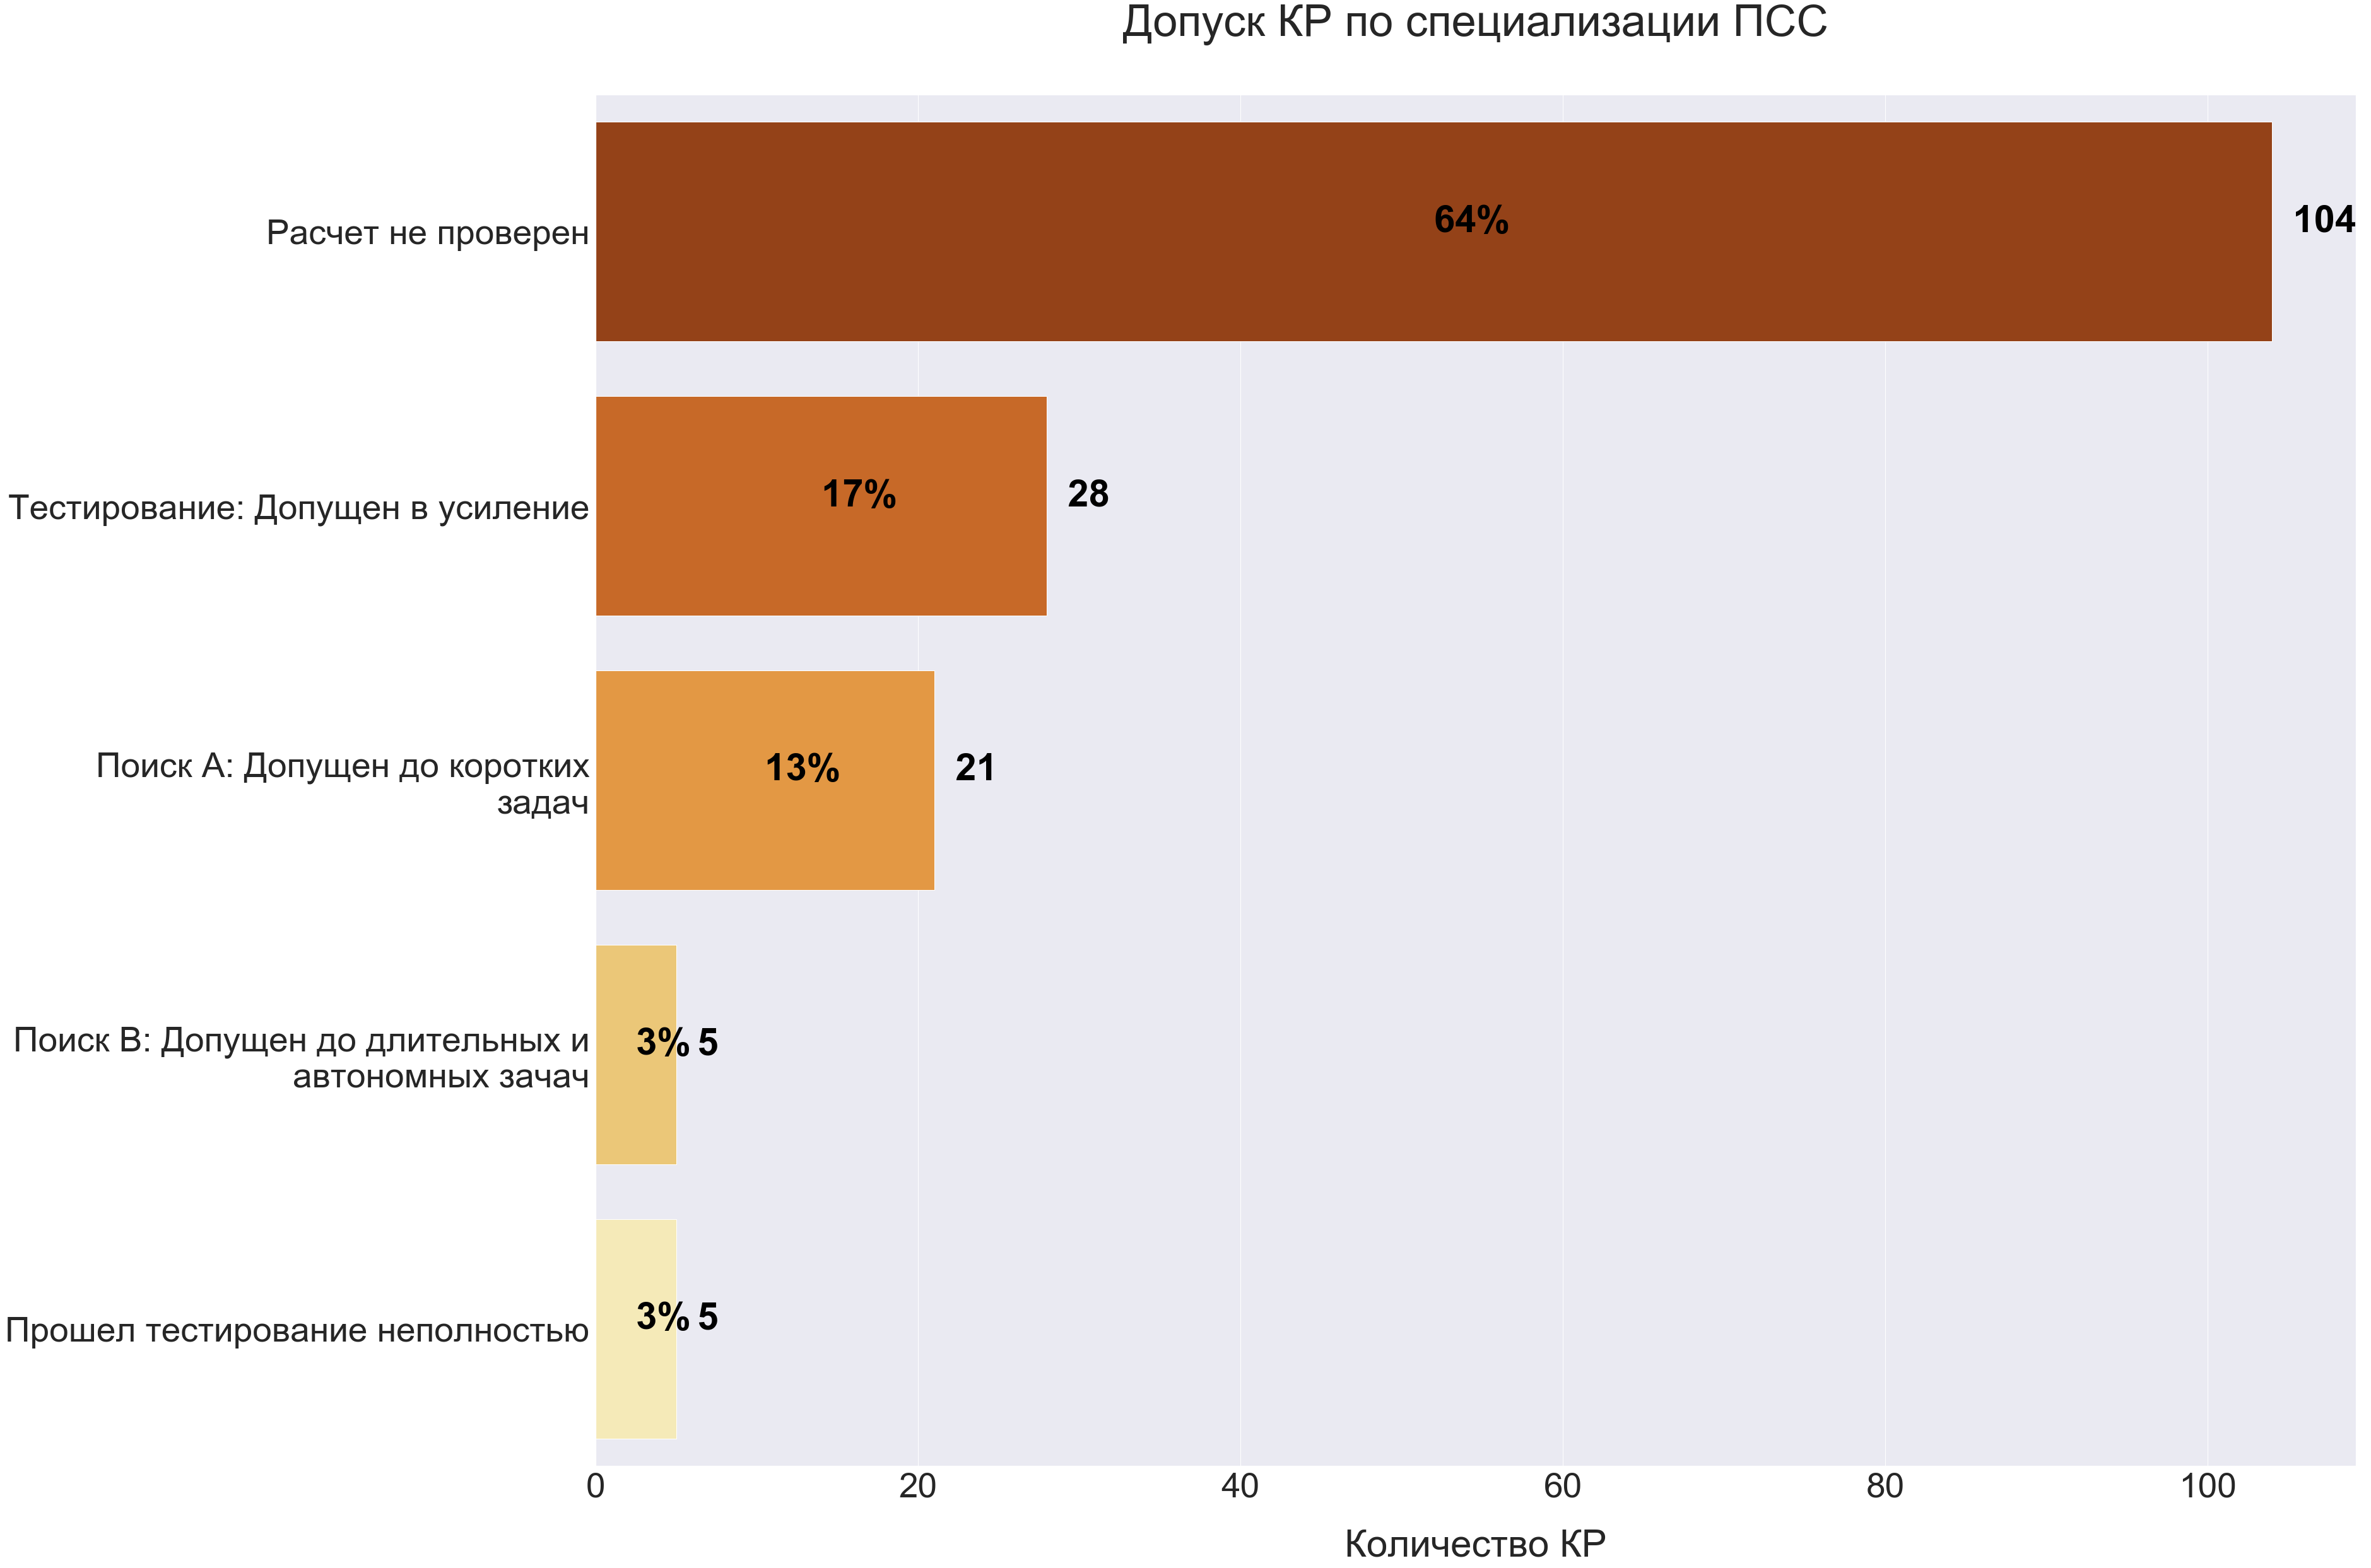

In [18]:
#функция для аннотирования столбцов диаграммы

def without_hue(plot):
    for p in plot.patches:
        _x = p. get_x () + p. get_width ()
        _y = p. get_y () + p. get_height ()*0.5
        value = '  {:.0f} '. format (p. get_width ())
        ax.text (_x, _y, value, ha="left", weight = 'bold', color = 'black')
        
def percent_func(plot, summa):
    for p in plot.patches:
        _x = p. get_x () + p. get_width ()*0.5
        _y = p. get_y () + p. get_height ()*0.5
        value = '{:.0f}% '. format (p. get_width ()*100/summa)
        ax.text (_x, _y, value, ha="left", weight = 'bold', color = 'black')
        
        
#размер области построения диаграммы
plt.figure(figsize=(50, 40)) 

#увеличиваем размер шрифта надписей на диаграмме
sns.set(font_scale = 5)  

#построение диаграммы
bars = sns.barplot(x ='Количество КР', y = 'Допуск', palette = 'YlOrBr_r', data = df_kinologist_att_msc_PSS) 

ax = plt.gca()

#аннотирование столбцов диаграммы

without_hue(bars)

percent_func(bars, df_kinologist_att_msc_PSS_sum)

#autolabel(ax.patches, df_kinologist_reg['Количество кинологов'], height_factor=1.01) 

#название диаграммы
bars.axes.set_title('Допуск КР по специализации ПСС', fontsize=70, y = 1.04) 

bars.set_xlabel('Количество КР', fontsize=60, labelpad = 40) #название оси Х

bars.set_ylabel(' ', fontsize=0, labelpad = 0) #название оси Y

#plt.xticks(rotation=45) #поворот значений по оси Х

plt.show() #показываем диаграмму 

### <a id="title4">2.2 Статус аттестации кинологических расчетов (ПТП)</a>

In [19]:
df_kinologist_att_msc_PTP = df_kinologist_att_msc_.loc[(df_kinologist_att_msc_['Специализация']=='ПТП')].sort_values(['Количество КР'], ascending = False)

mean_length = np.mean([len(i) for i in df_kinologist_att_msc_PTP['Допуск']])

df_kinologist_att_msc_PTP['Допуск'] = ["\n".join(textwrap.wrap(i,mean_length)) for i in df_kinologist_att_msc_PTP['Допуск']]


df_kinologist_att_msc_PTP

,Специализация,Допуск,Количество КР
6,ПТП,Расчет не проверен,31
5,ПТП,Гнилостные останки: допущен до\nдлительных и а...,4


In [20]:
df_kinologist_att_msc_PTP_sum = df_kinologist_att_msc_PTP['Количество КР'].sum()

df_kinologist_att_msc_PTP_sum

35

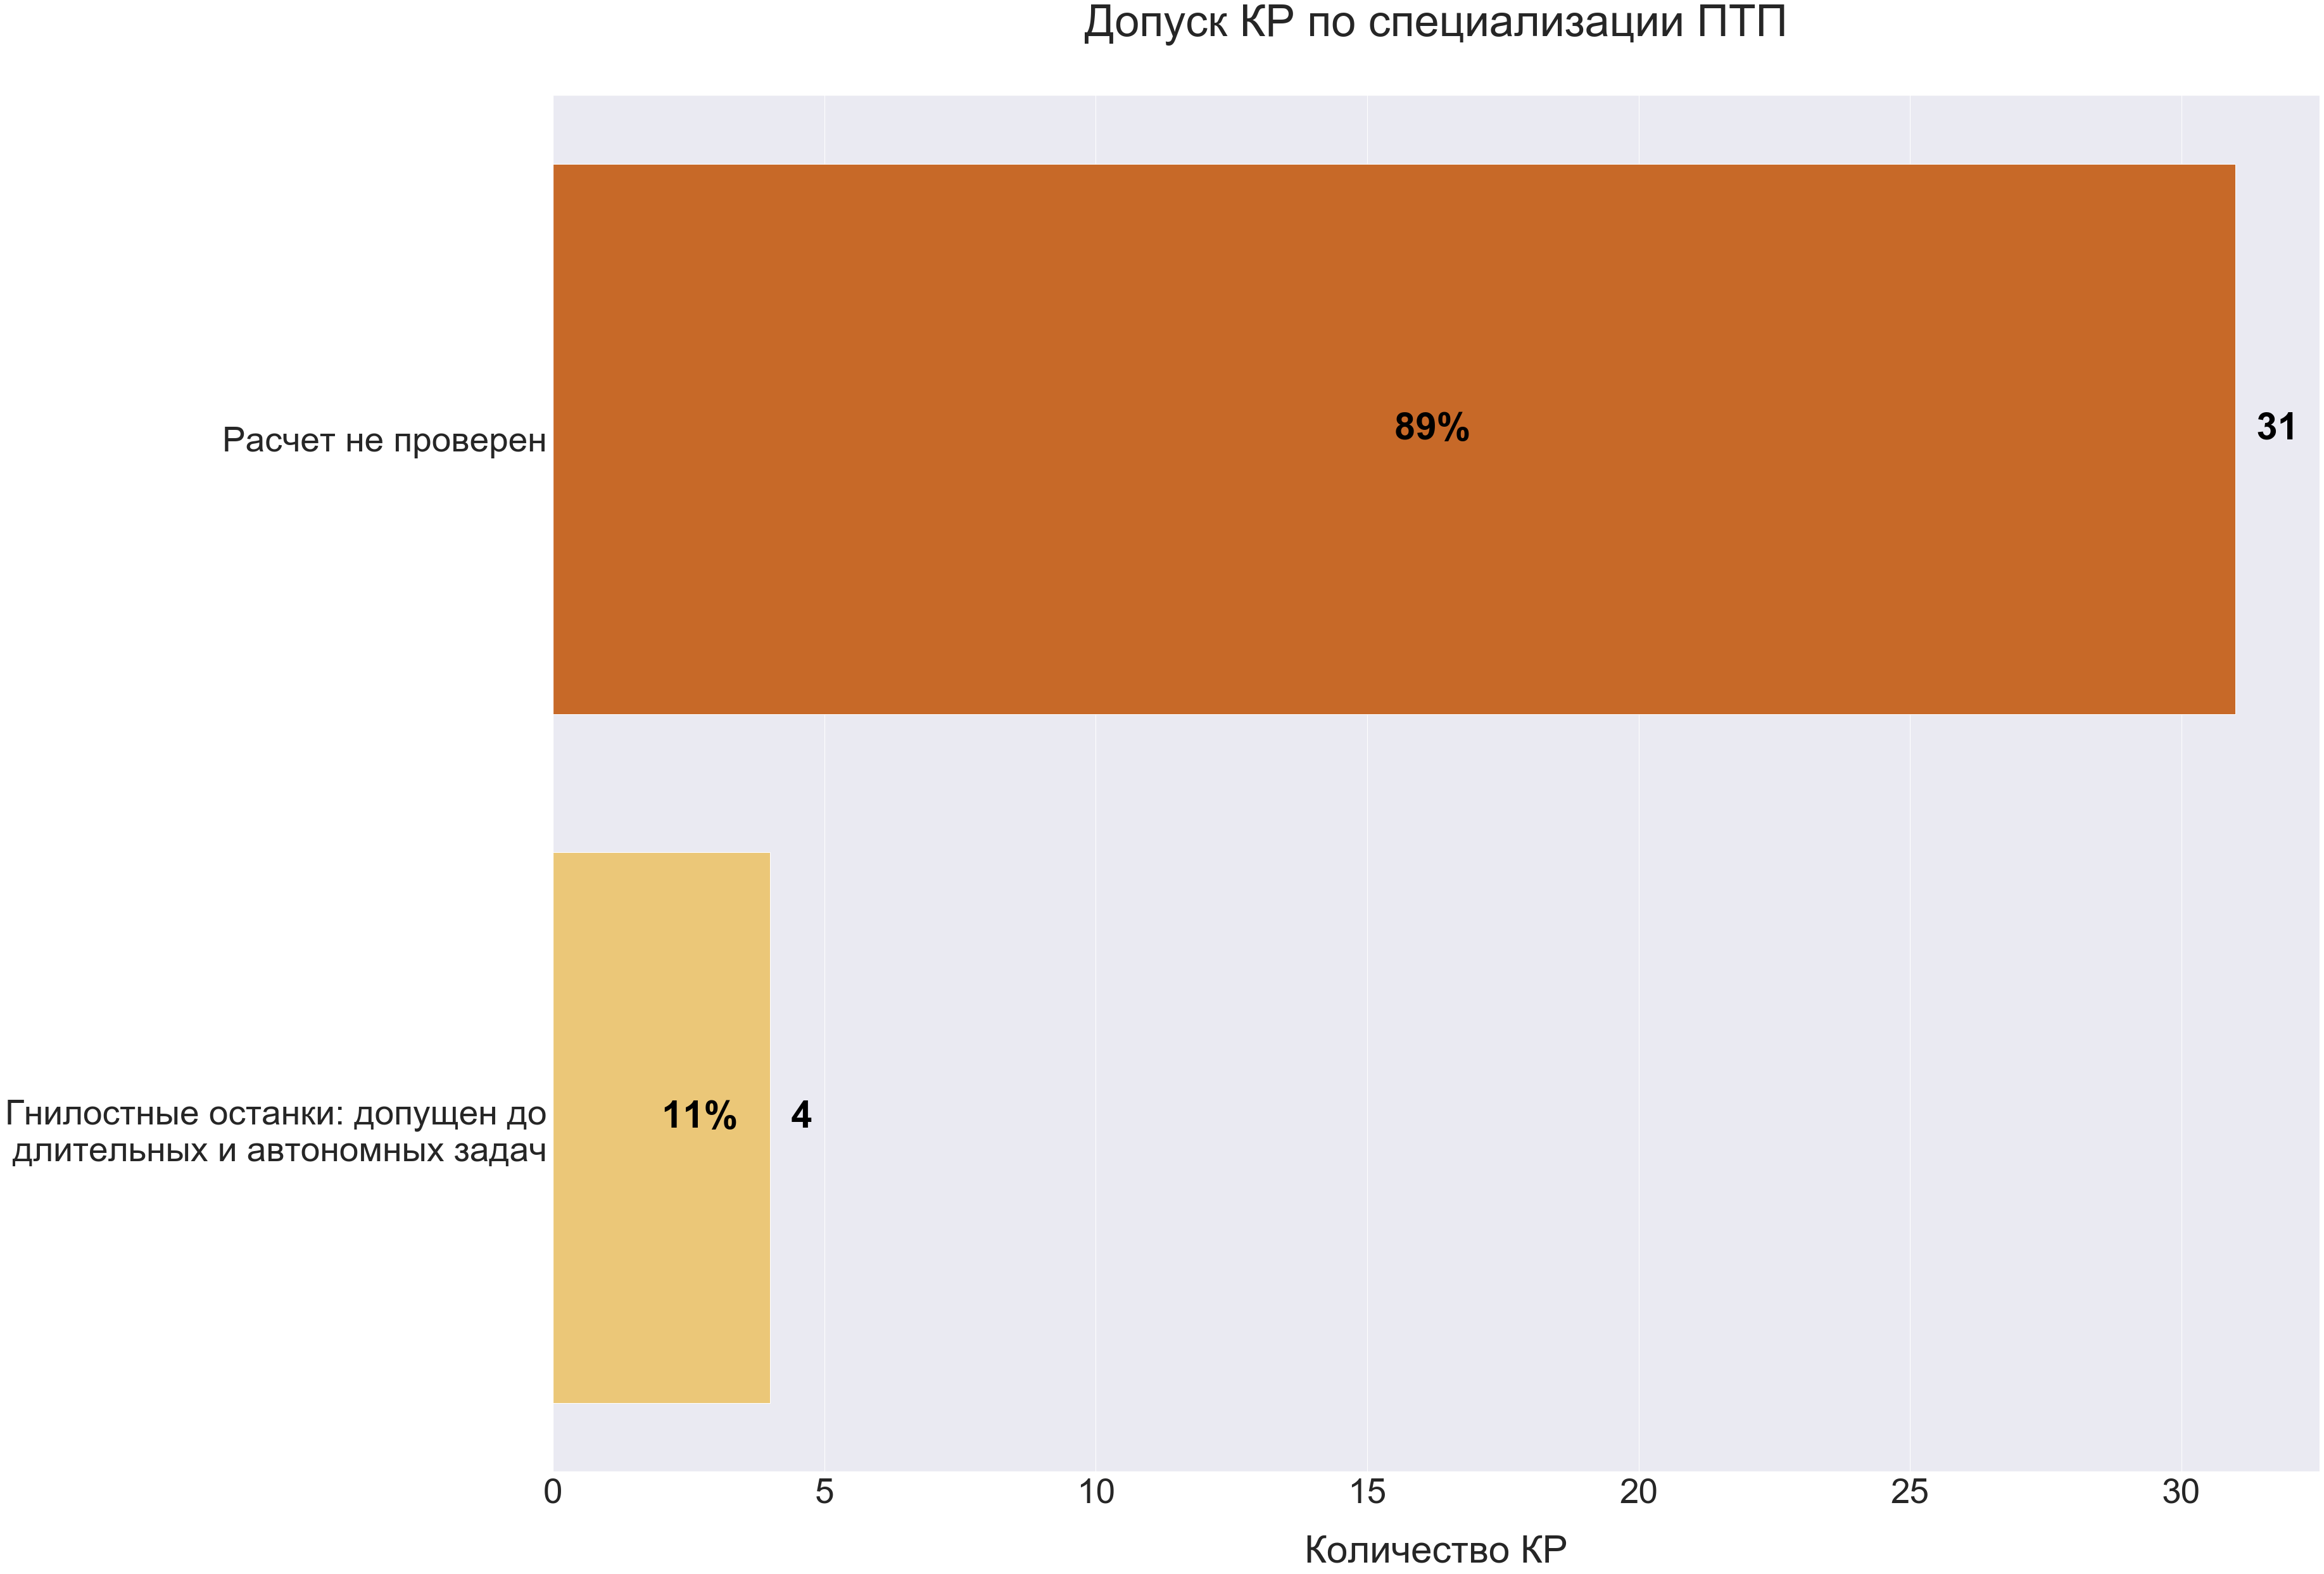

In [21]:

#размер области построения диаграммы
plt.figure(figsize=(50, 40)) 

#увеличиваем размер шрифта надписей на диаграмме
sns.set(font_scale = 5)  

#построение диаграммы
bars = sns.barplot(x ='Количество КР', y = 'Допуск', palette = 'YlOrBr_r', data = df_kinologist_att_msc_PTP) 

ax = plt.gca()

#аннотирование столбцов диаграммы

without_hue(bars)

percent_func(bars, df_kinologist_att_msc_PTP_sum)

#название диаграммы
bars.axes.set_title('Допуск КР по специализации ПТП', fontsize=70, y = 1.04) 

bars.set_xlabel('Количество КР', fontsize=60, labelpad = 40) #название оси Х

bars.set_ylabel(' ', fontsize=0, labelpad = 0) #название оси Y

#plt.xticks(rotation=45) #поворот значений по оси Х

plt.show() #показываем диаграмму 

### <a id="title5">2.3 Статус аттестации кинологических расчетов (След)</a>

In [22]:
df_kinologist_att_msc_Sled = df_kinologist_att_msc_.loc[(df_kinologist_att_msc_['Специализация']=='След')].sort_values(['Количество КР'], ascending = False)

mean_length = np.mean([len(i) for i in df_kinologist_att_msc_PTP['Допуск']])

df_kinologist_att_msc_Sled['Допуск'] = ["\n".join(textwrap.wrap(i,mean_length)) for i in df_kinologist_att_msc_Sled['Допуск']]


df_kinologist_att_msc_Sled

,Специализация,Допуск,Количество КР
8,След,Расчет не проверен,10
7,След,Допущен в тестовом режиме,4
9,След,"Успешно прошел этап А, допущен до ПСР",2


In [23]:
df_kinologist_att_msc_Sled_sum = df_kinologist_att_msc_Sled['Количество КР'].sum()

df_kinologist_att_msc_Sled_sum

16

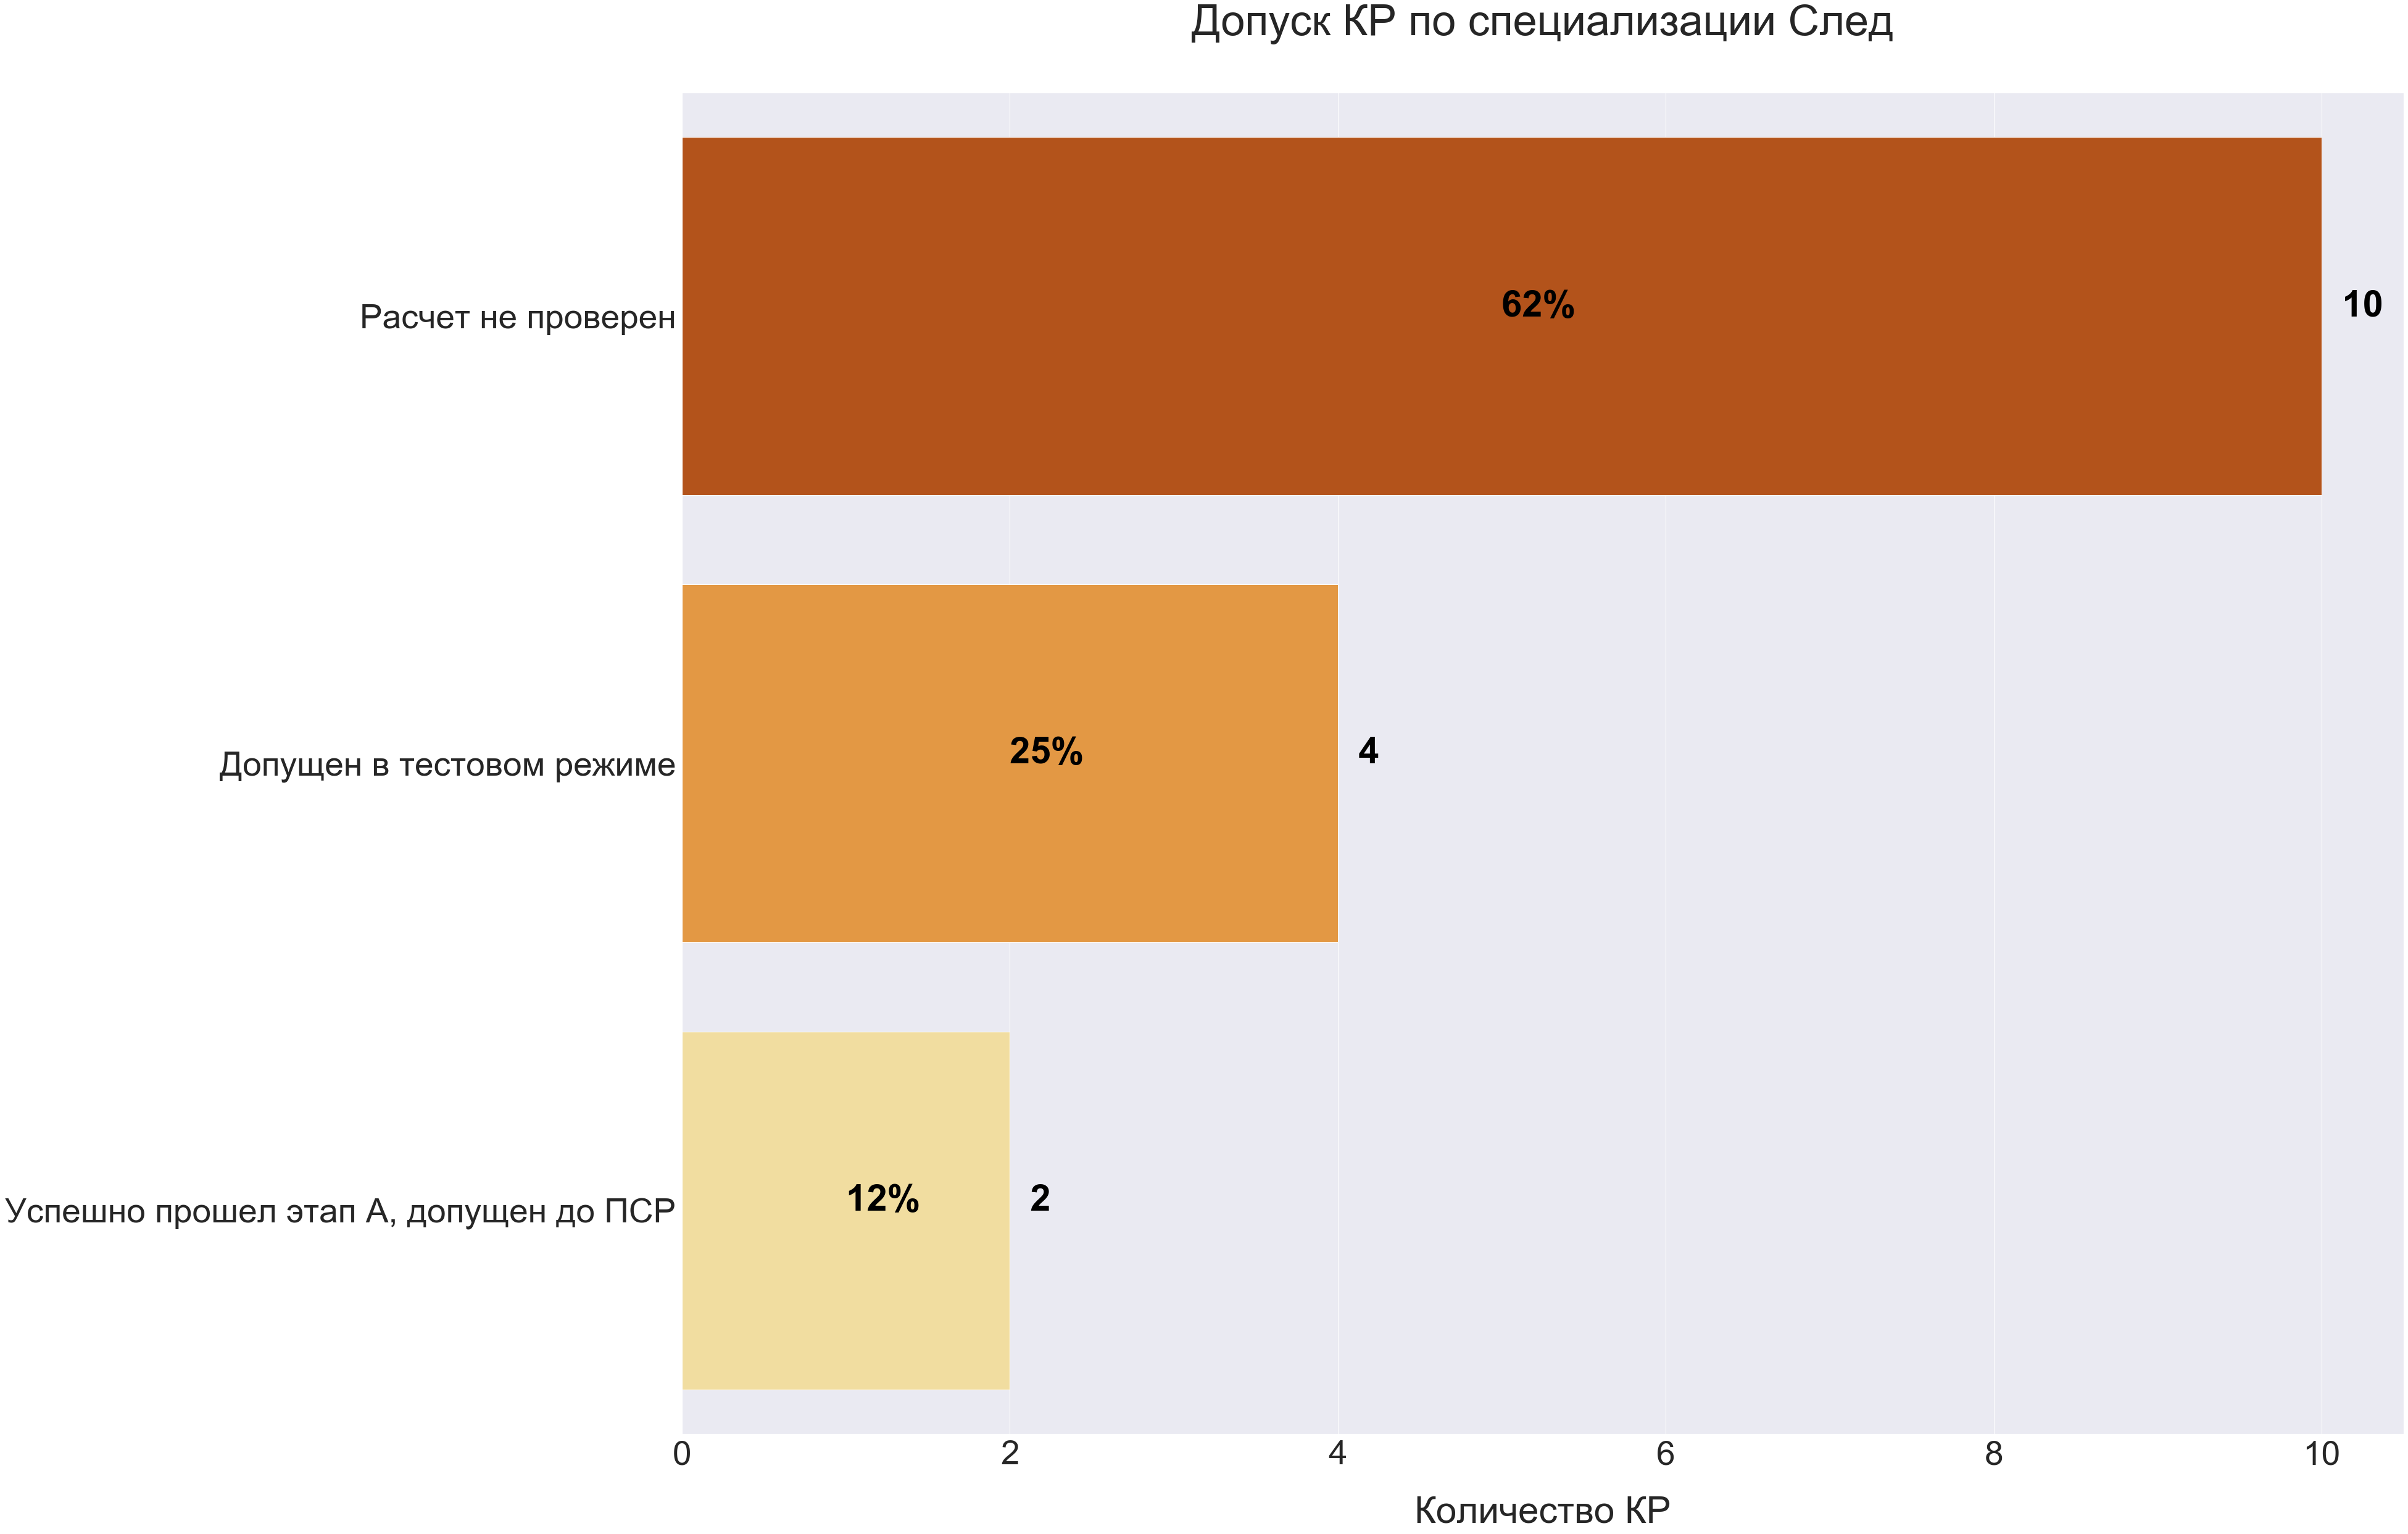

In [24]:
#размер области построения диаграммы
plt.figure(figsize=(50, 40)) 

#увеличиваем размер шрифта надписей на диаграмме
sns.set(font_scale = 5)  

#построение диаграммы
bars = sns.barplot(x ='Количество КР', y = 'Допуск', palette = 'YlOrBr_r', data = df_kinologist_att_msc_Sled) 

ax = plt.gca()

#аннотирование столбцов диаграммы

without_hue(bars)

percent_func(bars, df_kinologist_att_msc_Sled_sum)

#autolabel(ax.patches, df_kinologist_reg['Количество кинологов'], height_factor=1.01) 

#название диаграммы
bars.axes.set_title('Допуск КР по специализации След', fontsize=70, y = 1.04) 

bars.set_xlabel('Количество КР', fontsize=60, labelpad = 40) #название оси Х

bars.set_ylabel(' ', fontsize=0, labelpad = 0) #название оси Y

#plt.xticks(rotation=45) #поворот значений по оси Х

plt.show() #показываем диаграмму 

## <a id="title6">3. Статистика по группам подготовки</a>

In [25]:
#группируем по группам подготовки и считаем количество КР в каждой 
#(количество КР может быть больше, чем количество кинологов)

df_kinologist_groups_msc = df_kinologist_msc.groupby('Группа подготовки').agg({'Проводник':'count'})\
.rename(columns = {'Проводник':'Количество КР'}).sort_values(['Количество КР'], ascending = False).copy()

df_kinologist_groups_msc

,Количество КР
Группа подготовки,
Самоподготовка,26
PSS DOG,20
Кинологический поисковый отряд 2-К,17
"КСС ""Аргус""",16
"КОД ""Амулет""",14
"ВПСКО ""НОС""",13
"Волонтеры ПСС, Москва",13
"ПСКО ""ПУЛЬС""",11
"ПКГ ""Север""",11


In [26]:
#для подсчета кинологов убираем одинаковые строки по группам и проводникам

kin_group = df_kinologist_msc.drop_duplicates(subset = ['Проводник', 'Группа подготовки'])

kin_group


,Проводник,Регион,Специализация,Допуск,Группа подготовки
0,Алина Абдрахимова,Москва и МО,ПСС,Расчет не проверен,"ПСКО ""ПУЛЬС"""
1,Оксана Абрамочкина,Москва и МО,ПСС,Расчет не проверен,Кинологический поисковый отряд 2-К
2,Евгения Авдалян,Москва и МО,ПСС,Расчет не проверен,Самоподготовка
3,Евгения Авдеева,Москва и МО,ПСС,Расчет не проверен,"ПКГ ""Север"""
8,Елизавета Аксенова,Москва и МО,ПСС,Расчет не проверен,DogDrive
...,...,...,...,...,...
517,Алексей Шимин,Москва и МО,ПСС,Расчет не проверен,ПСКО «ФАРТ»
522,Каролина Элисс,Москва и МО,ПСС,Тестирование: Допущен в усиление,"КОД ""Амулет"""
523,Олеся Юрковская,Москва и МО,ПСС,Тестирование: Допущен в усиление,Кинологический поисковый отряд 2-К
526,Надежда Ягова,Москва и МО,ПСС,Тестирование: Допущен в усиление,Квант


In [27]:
#группируем по группам подготовки и считаем количество кинологов в каждой 

kin_group_count = kin_group.groupby('Группа подготовки').agg({'Проводник':'count'})\
.rename(columns = {'Проводник':'Количество кинологов'}).sort_values(['Количество кинологов'], ascending = False).copy()

kin_group_count

,Количество кинологов
Группа подготовки,
Самоподготовка,20
PSS DOG,19
Кинологический поисковый отряд 2-К,15
"КСС ""Аргус""",14
"ВПСКО ""НОС""",12
"КОД ""Амулет""",12
"ПКГ ""Север""",9
"Команда ""К""",8
"Волонтеры ПСС, Москва",8


In [28]:
#чтобы посмотреть количество выездов и выезжающих КР в группах подготовки возьмем информацию по выездам из другой таблицы


df_PSR = get_as_dataframe(sh.worksheet('Here_is_sheet_name'), parse_dates=True) 

#выбираем необходимые для работы строки и столбцы по индексу
df_PSR = df_PSR.iloc[0:3155, 0:5] 

df_PSR['Год'] = pd.to_datetime(df_PSR['Год']).dt.year

df_PSR['Специализация'] = df_PSR['Специализация'].str.lower()

In [29]:
df_PSR.head()

,Проводник,Собака,Специализация,Регион,Год
0,Наталия Волошина,Соня,след,Москва и МО,2019
1,Александр Зельбст,Муха,псс,Иркутская,2019
2,Алексей Баранов,Ёж,псс,Иркутская,2019
3,Игорь Ильин,Вигор,псс,Иркутская,2019
4,Татьяна Зельбст,Мутон,псс,Иркутская,2019


In [30]:
#рассмторим 2023 год

df_PSR_2023 = df_PSR.query("Год == 2023").copy()

df_PSR_2023.head()

,Проводник,Собака,Специализация,Регион,Год
1650,Дарья Павлова,Альфи,в обучении псс,Костромская,2023
1651,Владислав Скляр,Дик,след,Тульская,2023
1652,Анастасия Приймак,Юкки,в обучении след,Рязанская,2023
1653,Ирина Беляева,Лерой,в обучении след,Москва и МО,2023
1654,Константин Сташкевич,Треси,в обучении след,Челябинская,2023


In [31]:
#заменим статус подготовки на специализацию и рассмотрим только выезды с собаками (без двоек и выездов не по специализации)

df_PSR_2023 = df_PSR_2023.set_index('Специализация')

df_PSR_2023 = df_PSR_2023\
    .rename({'в обучении псс':'ПСС', 
             'усиление псс':'ПСС', 
             'псс':'ПСС', 
             'птп':'ПТП', 
             'в обучении птп':'ПТП',
            'двойка':'Двойка',
            'след':'След',
            'в обучении след':'След',
            'псс/птп':'ПСС/ПТП',
            'в обучении псс/птп':'ПСС/ПТП',
            'усиление птп':'ПТП'})



df_PSR_2023 = df_PSR_2023.drop(['Двойка', 'выезд не по специализации'], axis = 0).reset_index()

df_PSR_2023

,Специализация,Проводник,Собака,Регион,Год
0,ПСС,Дарья Павлова,Альфи,Костромская,2023
1,След,Владислав Скляр,Дик,Тульская,2023
2,След,Анастасия Приймак,Юкки,Рязанская,2023
3,След,Ирина Беляева,Лерой,Москва и МО,2023
4,След,Константин Сташкевич,Треси,Челябинская,2023
...,...,...,...,...,...
1366,ПТП,Юлия Кеслер,Чип/Алый,Москва и МО,2023
1367,ПТП,Юлия Кеслер,Чип/Алый,Москва и МО,2023
1368,ПТП,Светлана Колпак,Заноза/Ламбада,Ярославская,2023
1369,ПТП,Федор Евтюшкин,Тор,Ярославская,2023


In [32]:
df_PSR_2023['Специализация'].unique()

array(['ПСС', 'След', 'ПТП', 'ПСС/ПТП'], dtype=object)

In [33]:
df_PSR_2023_gr_prov = df_PSR_2023.groupby(['Проводник', 'Специализация']).agg({'Специализация':'count'})\
.rename(columns = {'Специализация':'Количество выездов'}).reset_index()

df_PSR_2023_gr_prov.head()

,Проводник,Специализация,Количество выездов
0,Ал Кузьмина,ПСС,1
1,Александр Антипов,ПСС,3
2,Александр Пономарев,ПСС,18
3,Александр Самович,ПСС,2
4,Александра Герасимова,ПТП,2


In [34]:
#подготовим ДФ для джойна

df_kinologist_for_merge = df_kinologist.iloc[:,0:5].copy()

df_kinologist_for_merge_msc = df_kinologist_for_merge.query("Регион == 'Москва и МО'")\
.rename(columns = {'Регион':'Регион кинолога'})

df_kinologist_for_merge_msc

,Проводник,Регион кинолога,Специализация,Допуск,Группа подготовки
0,Алина Абдрахимова,Москва и МО,ПСС,Расчет не проверен,"ПСКО ""ПУЛЬС"""
1,Оксана Абрамочкина,Москва и МО,ПСС,Расчет не проверен,Кинологический поисковый отряд 2-К
2,Евгения Авдалян,Москва и МО,ПСС,Расчет не проверен,Самоподготовка
3,Евгения Авдеева,Москва и МО,ПСС,Расчет не проверен,"ПКГ ""Север"""
8,Елизавета Аксенова,Москва и МО,ПСС,Расчет не проверен,DogDrive
...,...,...,...,...,...
522,Каролина Элисс,Москва и МО,ПСС,Тестирование: Допущен в усиление,"КОД ""Амулет"""
523,Олеся Юрковская,Москва и МО,ПСС,Тестирование: Допущен в усиление,Кинологический поисковый отряд 2-К
524,Олеся Юрковская,Москва и МО,ПТП,Расчет не проверен,Кинологический поисковый отряд 2-К
526,Надежда Ягова,Москва и МО,ПСС,Тестирование: Допущен в усиление,Квант


In [35]:
#для того,чтобы определить количество выездов в группах, необходимо добавить в таблицу выездов соответствующую информацию


df_kinologist_merge =df_PSR_2023_gr_prov.merge(df_kinologist_for_merge_msc, left_on = ['Проводник','Специализация']\
                                               , right_on = ['Проводник','Специализация'], how = 'left')

df_kinologist_merge = df_kinologist_merge.dropna(subset = ['Количество выездов']).astype(({'Количество выездов':np.int64}))

df_kinologist_merge_ = df_kinologist_merge.dropna(subset = ['Регион кинолога'])

df_kinologist_merge_

,Проводник,Специализация,Количество выездов,Регион кинолога,Допуск,Группа подготовки
2,Александр Пономарев,ПСС,18,Москва и МО,Поиск А: Допущен до коротких задач,221б
4,Александра Герасимова,ПТП,2,Москва и МО,Расчет не проверен,Кинологический поисковый отряд 2-К
5,Александра Зотова,ПСС,17,Москва и МО,Поиск А: Допущен до коротких задач,К-9 Курс
6,Александра Зотова,ПСС,17,Москва и МО,Поиск А: Допущен до коротких задач,К-9 Курс
8,Алексей Кашников,ПСС,1,Москва и МО,Расчет не проверен,"КОД ""Амулет"""
...,...,...,...,...,...,...
282,Юрий Ковалев,ПСС,8,Москва и МО,Поиск В: Допущен до длительных и автономных зачач,"ВПСКО ""НОС"""
283,Юрий Ковалев,ПТП,15,Москва и МО,Расчет не проверен,Самоподготовка
284,Ян Зоммер,ПСС,2,Москва и МО,Поиск А: Допущен до коротких задач,"КСС ""Аргус"""
285,Ян Зоммер,ПСС,2,Москва и МО,Тестирование: Допущен в усиление,"КСС ""Аргус"""


In [36]:
df_kinologist_merge_drop = df_kinologist_merge_.drop_duplicates(subset = ['Проводник', 'Специализация', 'Группа подготовки'])

df_kinologist_merge_drop

,Проводник,Специализация,Количество выездов,Регион кинолога,Допуск,Группа подготовки
2,Александр Пономарев,ПСС,18,Москва и МО,Поиск А: Допущен до коротких задач,221б
4,Александра Герасимова,ПТП,2,Москва и МО,Расчет не проверен,Кинологический поисковый отряд 2-К
5,Александра Зотова,ПСС,17,Москва и МО,Поиск А: Допущен до коротких задач,К-9 Курс
8,Алексей Кашников,ПСС,1,Москва и МО,Расчет не проверен,"КОД ""Амулет"""
13,Алена Данилова,ПСС,6,Москва и МО,Поиск А: Допущен до коротких задач,"ПСКО ""ПУЛЬС"""
...,...,...,...,...,...,...
280,Юлия Халимова,ПСС,5,Москва и МО,Расчет не проверен,PSS DOG
281,Юрий Ковалев,ПСС,8,Москва и МО,Поиск А: Допущен до коротких задач,"ВПСКО ""НОС"""
283,Юрий Ковалев,ПТП,15,Москва и МО,Расчет не проверен,Самоподготовка
284,Ян Зоммер,ПСС,2,Москва и МО,Поиск А: Допущен до коротких задач,"КСС ""Аргус"""


In [37]:
df_kinologist_merge_.isnull().sum()

Проводник             0
Специализация         0
Количество выездов    0
Регион кинолога       0
Допуск                0
Группа подготовки     0
dtype: int64

### <a id="title7">3.1 Количество групп подготовки по различным специализациям</a>

In [38]:
#посчитаем количество выездов в группах по различным специализациям 

df_group_PSR_msc_count = df_kinologist_merge_drop.groupby(['Группа подготовки', 'Специализация']).agg({'Количество выездов':'sum'}).sort_values(['Количество выездов'], ascending = False).reset_index()

df_group_PSR_msc_count

,Группа подготовки,Специализация,Количество выездов
0,"Команда ""К""",ПТП,125
1,"КОД ""Амулет""",ПСС,82
2,"КСС ""Аргус""",ПСС,64
3,"ВПСКО ""НОС""",ПСС,45
4,Самоподготовка,ПТП,40
5,"ПКГ ""Север""",ПСС,38
6,221б,ПСС,34
7,Вега,ПСС,31
8,"ПСКО ""ПУЛЬС""",ПСС,31
9,Кинологический поисковый отряд 2-К,ПТП,27


In [39]:
df_group_PSR_msc_spec_sum = df_group_PSR_msc_count['Группа подготовки'].count()

print(f'Всего групп подготовки: {df_group_PSR_msc_spec_sum}')

Всего групп подготовки: 26


In [40]:
df_group_PSR_msc_psr_sum = df_group_PSR_msc_count['Количество выездов'].sum()

print(f'Всего выездов в группах подготовки: {df_group_PSR_msc_psr_sum}')

Всего выездов в группах подготовки: 732


In [41]:
#посчитаем группы подготовки по разным специальности (одна группа может готовить по нескольким специальностям)

df_group_PSR_msc_spec = df_group_PSR_msc_count.groupby('Специализация').agg({'Группа подготовки':'count'})\
.sort_values(['Группа подготовки'], ascending = False).rename(columns = {'Группа подготовки':'Количество групп'}).reset_index()

df_group_PSR_msc_spec

,Специализация,Количество групп
0,ПСС,17
1,ПТП,5
2,След,4


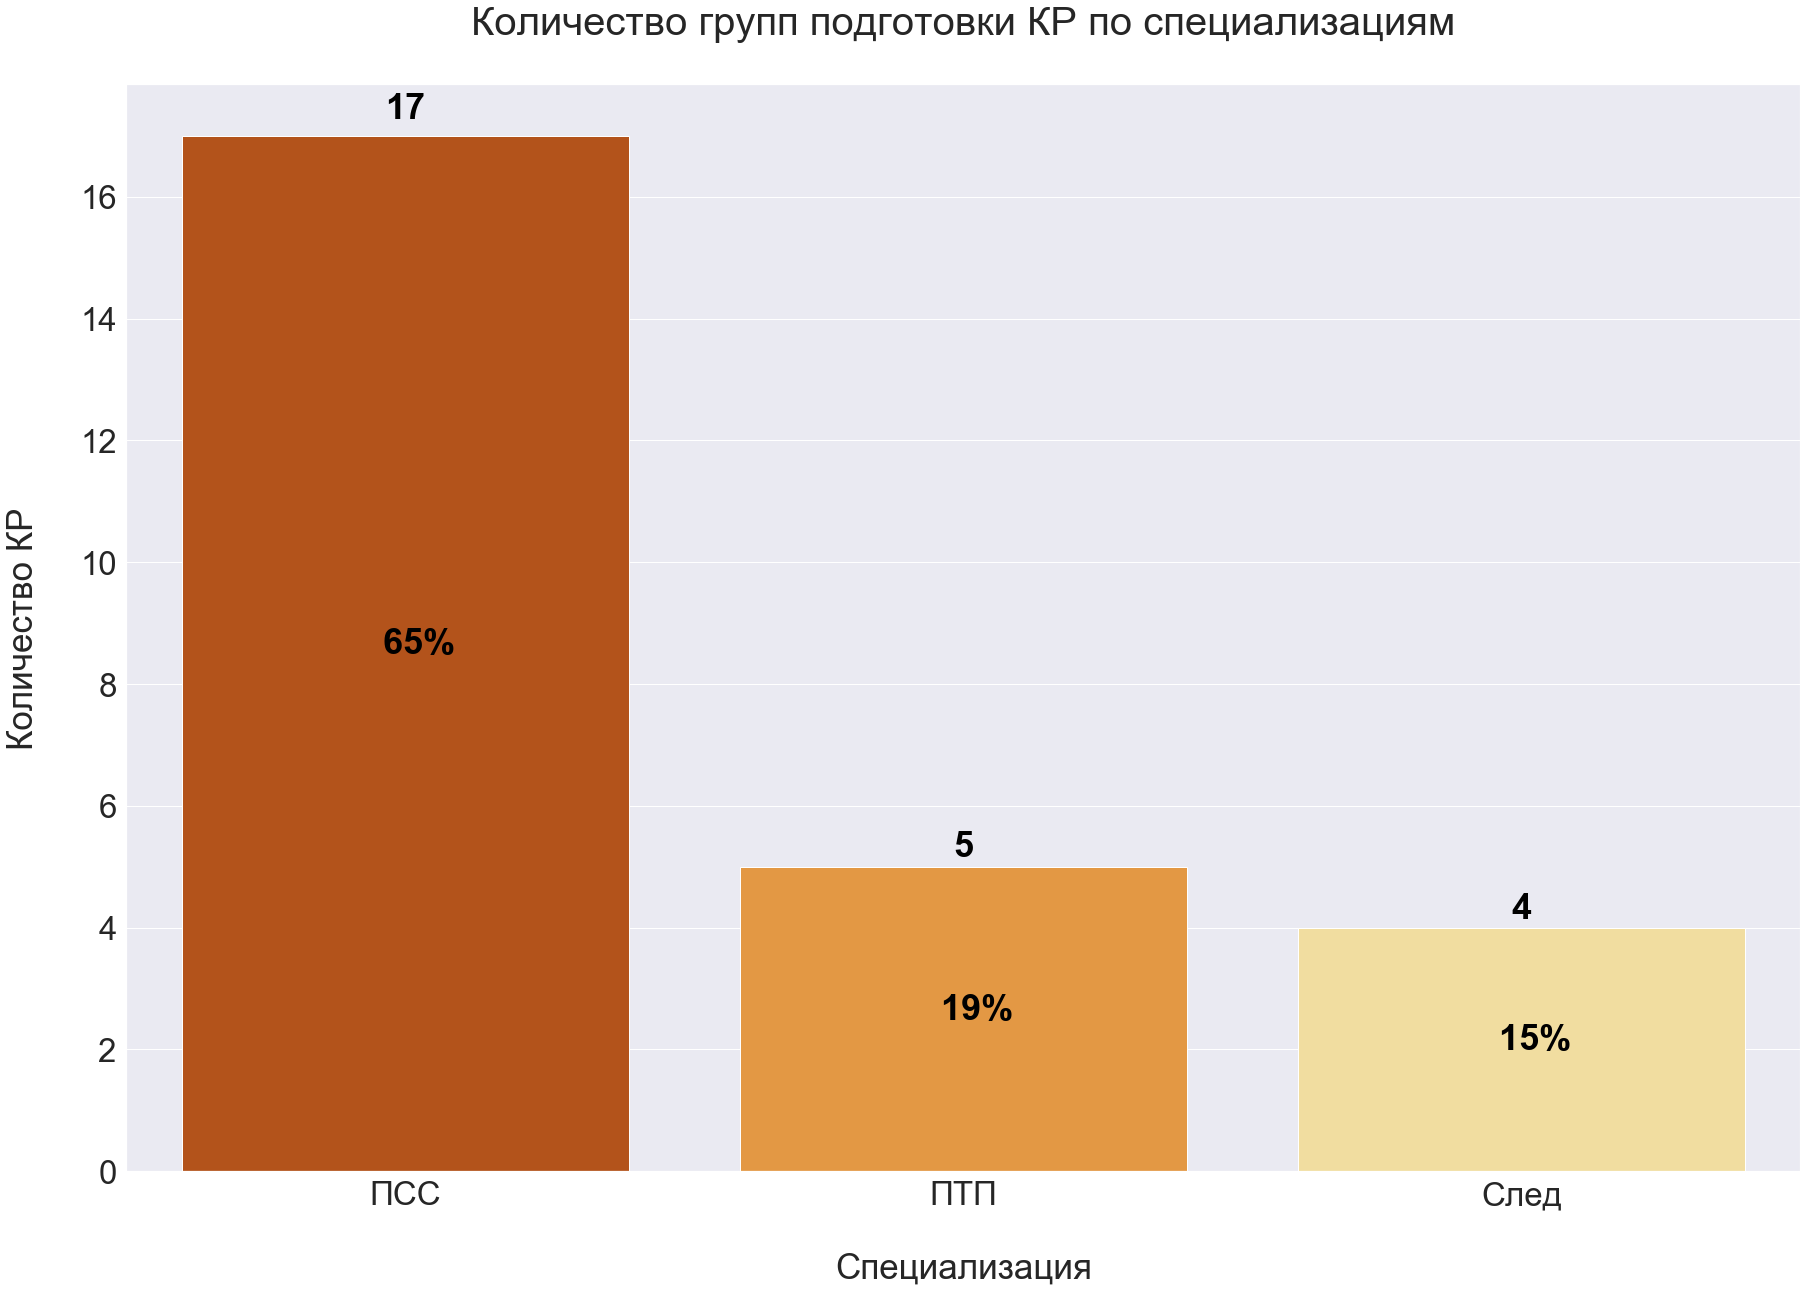

In [42]:
#размер области построения диаграммы
plt.figure(figsize=(30, 20)) 

#увеличиваем размер шрифта надписей на диаграмме
sns.set(font_scale = 3)  

#построение диаграммы
bars = sns.barplot(x ='Специализация', y = 'Количество групп', palette = 'YlOrBr_r', data = df_group_PSR_msc_spec) 

ax = plt.gca()

#аннотирование столбцов диаграммы
autolabel(ax.patches, df_group_PSR_msc_spec['Количество групп'], height_factor=1.01) 

percent_func_v(bars, df_group_PSR_msc_spec_sum) 

#название диаграммы
bars.axes.set_title('Количество групп подготовки КР по специализациям', fontsize=40, y = 1.04) 

bars.set_xlabel('Специализация', fontsize=35, labelpad = 40) #название оси Х

bars.set_ylabel('Количество КР', fontsize=35, labelpad = 40) #название оси Y

plt.xticks(rotation=0) #поворот значений по оси Х

plt.show() #показываем диаграмму 

На данный момент в Московском регионе 26 активных групп подготовки (за сезон по крайней мере 1 КР выезжал на поиск), в том числе и самоподготовка. Из них:

•	ПСС – 17 групп (65 %);

•	ПТП – 5 групп (19 %);

•	След – 4 группы (15 %).

КР из активных групп подготовки за сезон было совершено 732 выездов (без учета выездов двойкой и не по специализации!!!).


### <a id="title8">3.2 Количество выездов в группах по различным специализациям</a>

In [43]:
df_group_PSR_msc_count_ = df_kinologist_merge_drop.pivot_table(index = ['Специализация'],
                         columns = 'Группа подготовки',
                         values = 'Количество выездов',
                         aggfunc = 'sum',
                         fill_value = 0).reset_index().copy()

ddf_group_PSR_msc_count_  = df_group_PSR_msc_count_.set_index('Специализация')\
  .reindex(df_group_PSR_msc_count_.set_index('Специализация').sum().sort_values(ascending=False).index, axis=1)

ddf_group_PSR_msc_count_

Группа подготовки,"Команда ""К""","КОД ""Амулет""","КСС ""Аргус""",Самоподготовка,Кинологический поисковый отряд 2-К,"ВПСКО ""НОС""","ПКГ ""Север""","Волонтеры ПСС, Москва",221б,"ПСКО ""ПУЛЬС""",...,PSS DOG,"УДЦ ""Сириус""",ЛИЗА СЛЕД,Квант,К-9 Курс,DogDrive,Ориентир,"СКО "" Следопыт Дети""",Лесные псы,ПСКО «ФАРТ»
Специализация,,,,,,,,,,,,,,,,,,,,,
ПСС,0,82,64,8,22,45,38,24,34,31,...,21,19,0,17,17,15,0,0,4,1
ПТП,125,0,0,40,27,0,0,13,0,0,...,0,0,8,0,0,0,0,0,0,0
След,0,0,0,15,0,0,0,0,0,0,...,0,0,9,0,0,0,13,9,0,0


In [44]:
ddf_group_PSR_msc_count_.T

Специализация,ПСС,ПТП,След
Группа подготовки,,,
"Команда ""К""",0,125,0
"КОД ""Амулет""",82,0,0
"КСС ""Аргус""",64,0,0
Самоподготовка,8,40,15
Кинологический поисковый отряд 2-К,22,27,0
"ВПСКО ""НОС""",45,0,0
"ПКГ ""Север""",38,0,0
"Волонтеры ПСС, Москва",24,13,0
221б,34,0,0


In [45]:
totals = ddf_group_PSR_msc_count_.sum(axis=0)


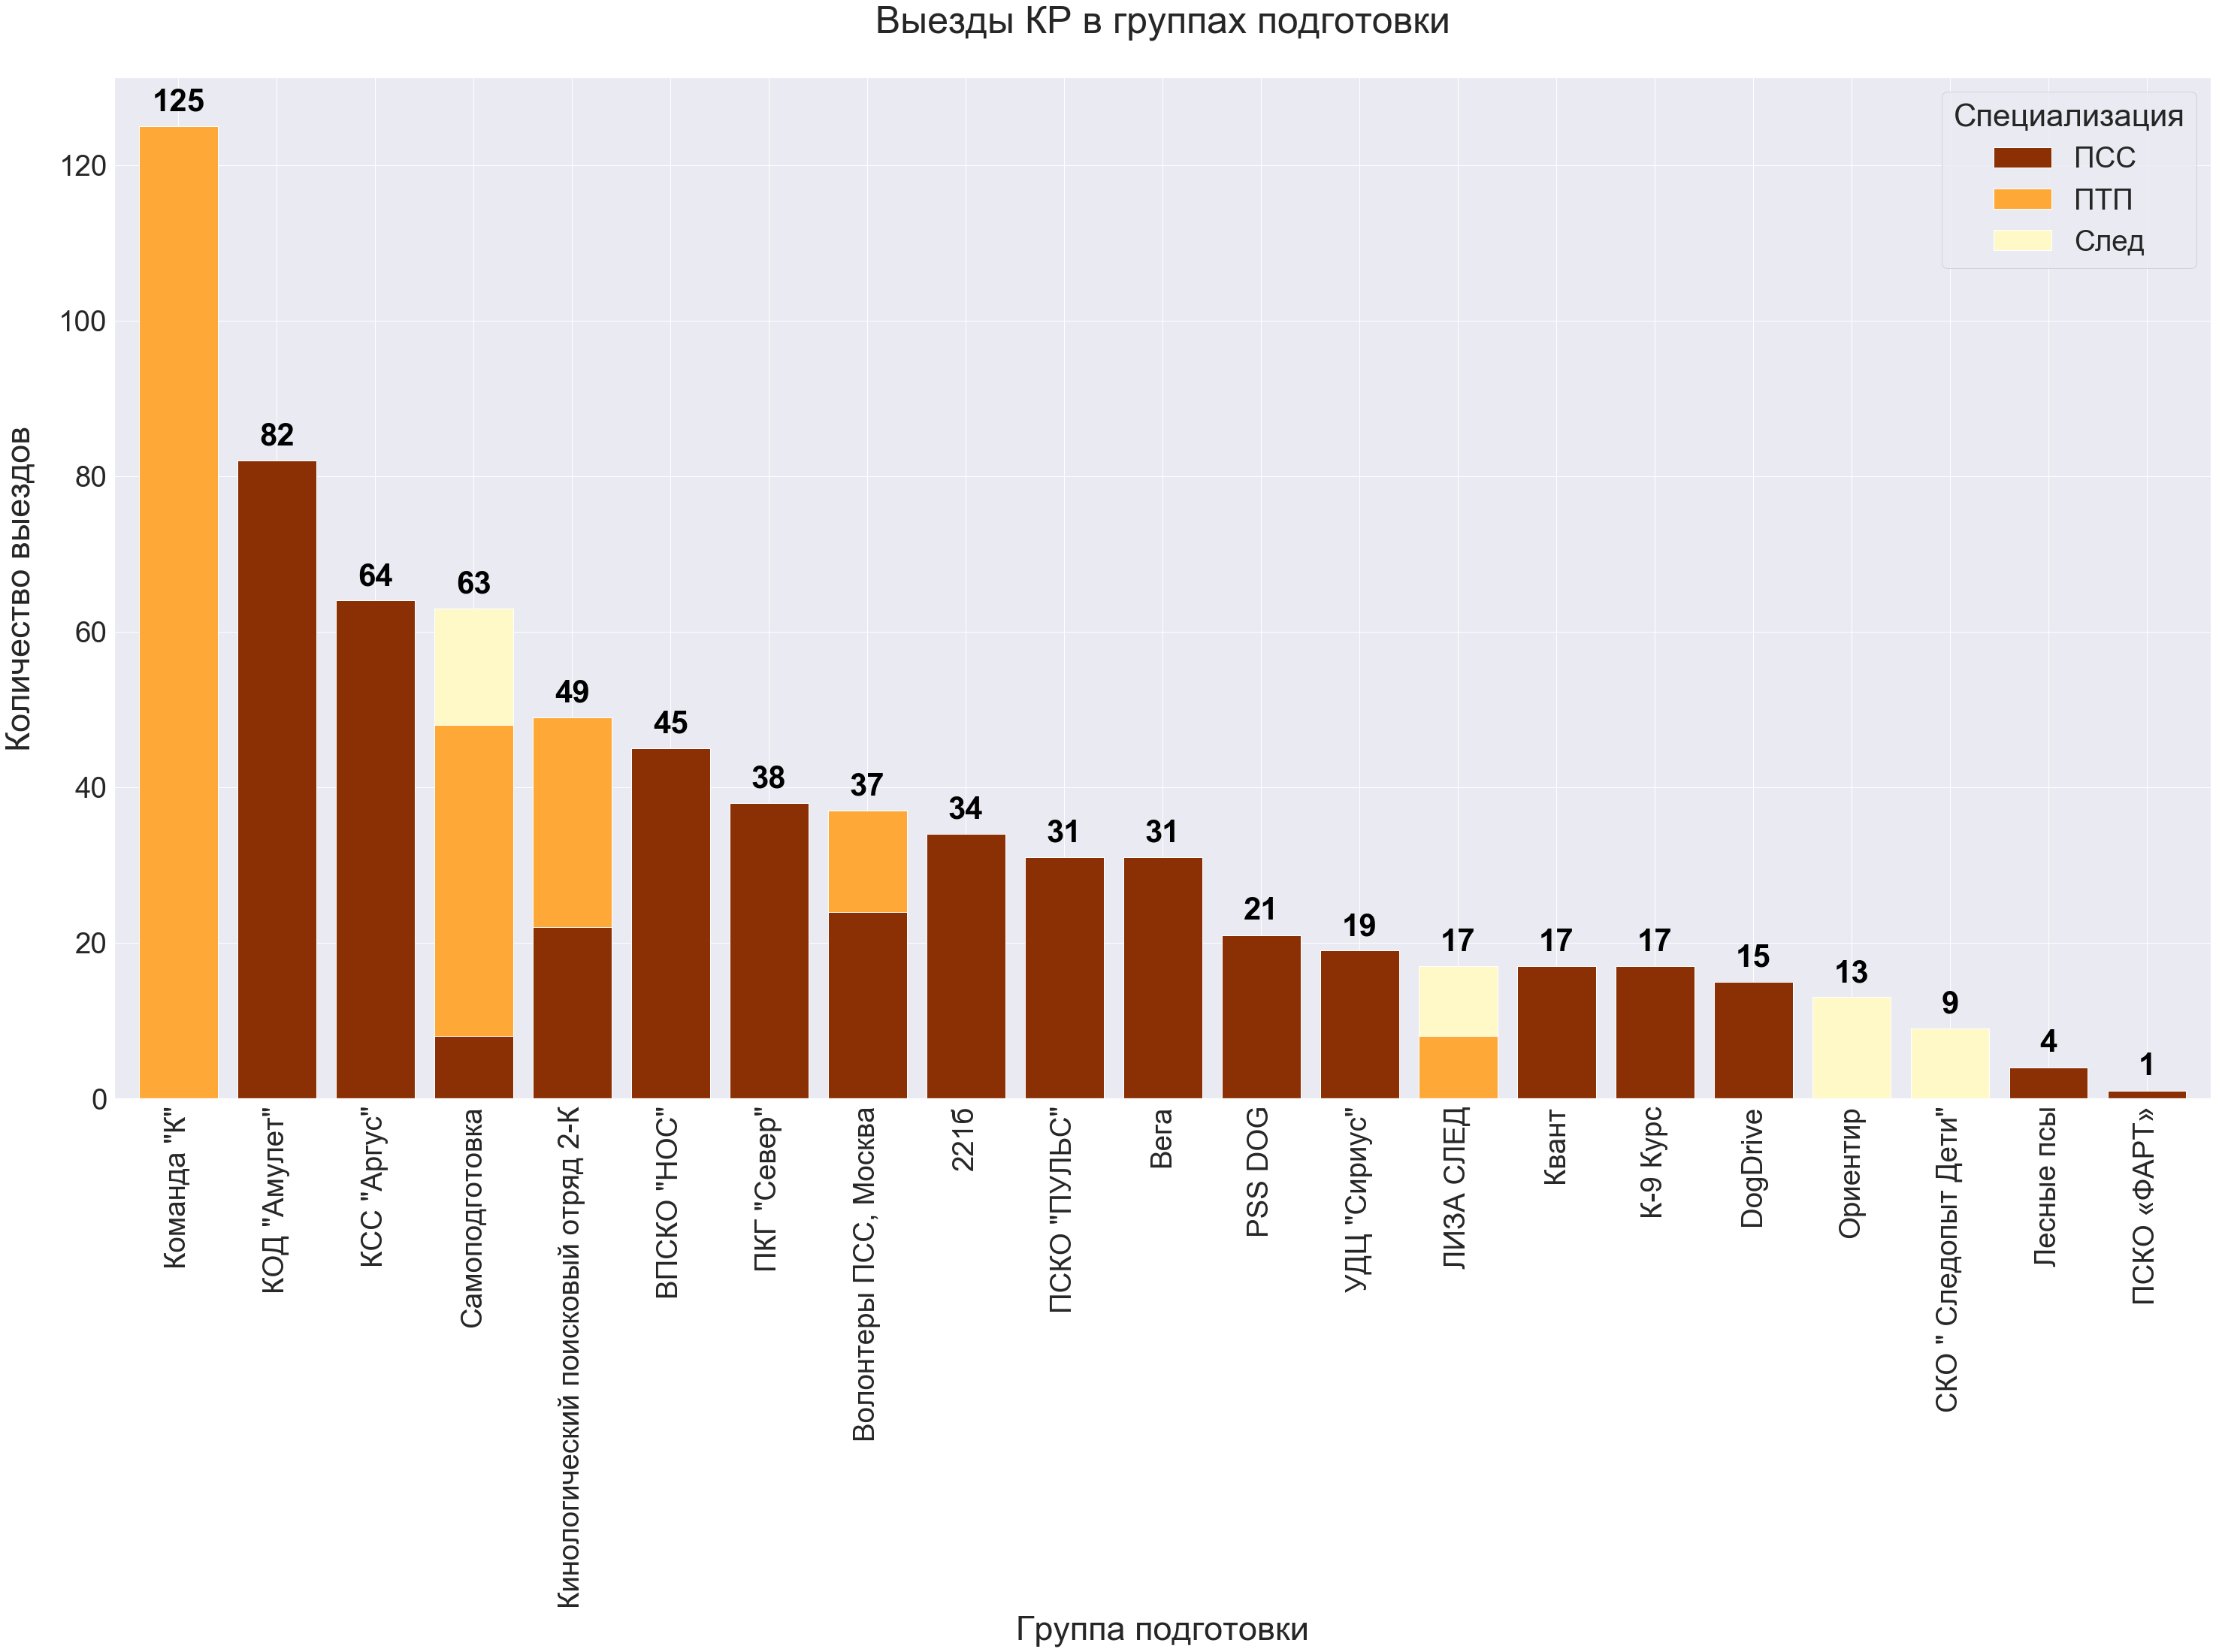

In [46]:
sns.set(font_scale = 3.5)

bars = ddf_group_PSR_msc_count_.T.plot(kind='bar', width = 0.8, stacked=True,
          colormap=ListedColormap(sns.color_palette("YlOrBr_r", 10)), 
          figsize=(50,25))

# Add labels to each bar.
for i, tot in enumerate(totals):
    bars.text(i, tot + 2, round(tot),
          ha = 'center', weight = 'bold', color = 'black')

bars.axes.set_title('Выезды КР в группах подготовки', fontsize=50, y = 1.04) 

bars.set_xlabel('Группа подготовки', fontsize=45, labelpad = 10) #название оси Х

bars.set_ylabel('Количество выездов', fontsize=45, labelpad = 30) #название оси Y

plt.xticks(rotation=90) #поворот значений по оси Х

plt.show() #показываем диаграмму 

### <a id="title9">3.3 Количество выезжающих кинологов в группах подготовки</a>

In [47]:
#посчитаем количество выезжающих кинологов в группах подготовки

df_act_kin_group = df_kinologist_merge_drop.groupby('Группа подготовки').agg({'Проводник':'count'})\
.sort_values(['Проводник'], ascending = False).rename(columns = {'Проводник':'Количество выезжающих кинологов'})

df_act_kin_group

,Количество выезжающих кинологов
Группа подготовки,
Кинологический поисковый отряд 2-К,13
Самоподготовка,11
"КСС ""Аргус""",10
"КОД ""Амулет""",9
"Волонтеры ПСС, Москва",8
"Команда ""К""",8
"ПКГ ""Север""",7
"ВПСКО ""НОС""",7
"ПСКО ""ПУЛЬС""",7


In [48]:
df_act_kin_group_merge = df_act_kin_group.merge(kin_group_count, left_on = ['Группа подготовки']\
                                               , right_on = ['Группа подготовки'], how = 'left')\
.sort_values(['Количество кинологов'], ascending = False)

df_act_kin_group_merge

,Количество выезжающих кинологов,Количество кинологов
Группа подготовки,,
Самоподготовка,11,20
PSS DOG,6,19
Кинологический поисковый отряд 2-К,13,15
"КСС ""Аргус""",10,14
"КОД ""Амулет""",9,12
"ВПСКО ""НОС""",7,12
"ПКГ ""Север""",7,9
"Волонтеры ПСС, Москва",8,8
"Команда ""К""",8,8


In [49]:
#здесь и далее колонка "Количество кинологов в группе" на самом деле - количество невыезжающих кинологов. 
#такое имя дано для того, чтобы в дальнейшем легче интерпретировать сводную диграмму

df_act_kin_group_merge['Количество кинологов в группе'] = df_act_kin_group_merge['Количество кинологов'] - df_act_kin_group_merge['Количество выезжающих кинологов']

df_act_kin_group_merge = df_act_kin_group_merge.drop(['Количество кинологов'], axis = 1)

df_act_kin_group_merge

,Количество выезжающих кинологов,Количество кинологов в группе
Группа подготовки,,
Самоподготовка,11,9
PSS DOG,6,13
Кинологический поисковый отряд 2-К,13,2
"КСС ""Аргус""",10,4
"КОД ""Амулет""",9,3
"ВПСКО ""НОС""",7,5
"ПКГ ""Север""",7,2
"Волонтеры ПСС, Москва",8,0
"Команда ""К""",8,0


In [50]:
df_act_kin_group_merge_ = df_act_kin_group_merge.T.reset_index()

df_act_kin_group_merge_

Группа подготовки,index,Самоподготовка,PSS DOG,Кинологический поисковый отряд 2-К,"КСС ""Аргус""","КОД ""Амулет""","ВПСКО ""НОС""","ПКГ ""Север""","Волонтеры ПСС, Москва","Команда ""К""",...,"ПСКО ""ПУЛЬС""",221б,Ориентир,ПСКО «ФАРТ»,"УДЦ ""Сириус""",DogDrive,ЛИЗА СЛЕД,Лесные псы,"СКО "" Следопыт Дети""",К-9 Курс
0,Количество выезжающих кинологов,11,6,13,10,9,7,7,8,8,...,7,4,3,1,2,1,2,1,1,1
1,Количество кинологов в группе,9,13,2,4,3,5,2,0,0,...,0,2,3,5,3,2,0,0,0,0


In [51]:
ddf_act_kin_group_merge_  = df_act_kin_group_merge_.set_index(['index'])\
  .reindex(df_act_kin_group_merge_.set_index(['index']).sum().sort_values(ascending=False).index, axis=1)

ddf_act_kin_group_merge_ 

Группа подготовки,Самоподготовка,PSS DOG,Кинологический поисковый отряд 2-К,"КСС ""Аргус""","КОД ""Амулет""","ВПСКО ""НОС""","ПКГ ""Север""","Волонтеры ПСС, Москва","Команда ""К""",Квант,...,"ПСКО ""ПУЛЬС""",221б,Ориентир,ПСКО «ФАРТ»,"УДЦ ""Сириус""",DogDrive,ЛИЗА СЛЕД,"СКО "" Следопыт Дети""",Лесные псы,К-9 Курс
index,,,,,,,,,,,,,,,,,,,,,
Количество выезжающих кинологов,11,6,13,10,9,7,7,8,8,5,...,7,4,3,1,2,1,2,1,1,1
Количество кинологов в группе,9,13,2,4,3,5,2,0,0,2,...,0,2,3,5,3,2,0,0,0,0


In [52]:
#добавим колонки с общим количеством кинологов и процентом выезжающих кинологов в группах

#теперь мы имеем сводный ДФ с полной информацией

df_totals_act = ddf_act_kin_group_merge_.T

df_totals_act['Кинологов в группе'] = df_totals_act['Количество выезжающих кинологов'] + df_totals_act['Количество кинологов в группе']

df_totals_act['Процент выезжающих'] = round(df_totals_act['Количество выезжающих кинологов']*100/df_totals_act['Кинологов в группе']).astype(int)

df_totals_act

index,Количество выезжающих кинологов,Количество кинологов в группе,Кинологов в группе,Процент выезжающих
Группа подготовки,,,,
Самоподготовка,11,9,20,55
PSS DOG,6,13,19,32
Кинологический поисковый отряд 2-К,13,2,15,87
"КСС ""Аргус""",10,4,14,71
"КОД ""Амулет""",9,3,12,75
"ВПСКО ""НОС""",7,5,12,58
"ПКГ ""Север""",7,2,9,78
"Волонтеры ПСС, Москва",8,0,8,100
"Команда ""К""",8,0,8,100


In [53]:
totals = ddf_act_kin_group_merge_.sum(axis=0)

totals

Группа подготовки
Самоподготовка                        20
PSS DOG                               19
Кинологический поисковый отряд 2-К    15
КСС "Аргус"                           14
КОД "Амулет"                          12
ВПСКО "НОС"                           12
ПКГ "Север"                            9
Волонтеры ПСС, Москва                  8
Команда "К"                            8
Квант                                  7
Вега                                   7
ПСКО "ПУЛЬС"                           7
221б                                   6
Ориентир                               6
ПСКО «ФАРТ»                            6
УДЦ "Сириус"                           5
DogDrive                               3
ЛИЗА СЛЕД                              2
СКО " Следопыт Дети"                   1
Лесные псы                             1
К-9 Курс                               1
dtype: int64

In [54]:
df_totals_act['Кинологов в группе'].sum() #всего кинологов в активных группах

169

In [55]:
df_totals_act['Количество выезжающих кинологов'].sum() #количество выезжающих кинологов в активных группах

113

In [56]:
#общий процент выезжающих кинологов

df_totals_act['Количество выезжающих кинологов'].sum()*100/df_totals_act['Кинологов в группе'].sum() 

66.86390532544378

In [57]:
totals_act = df_totals_act['Количество выезжающих кинологов']


In [58]:
totals_act_perc = df_totals_act['Процент выезжающих']


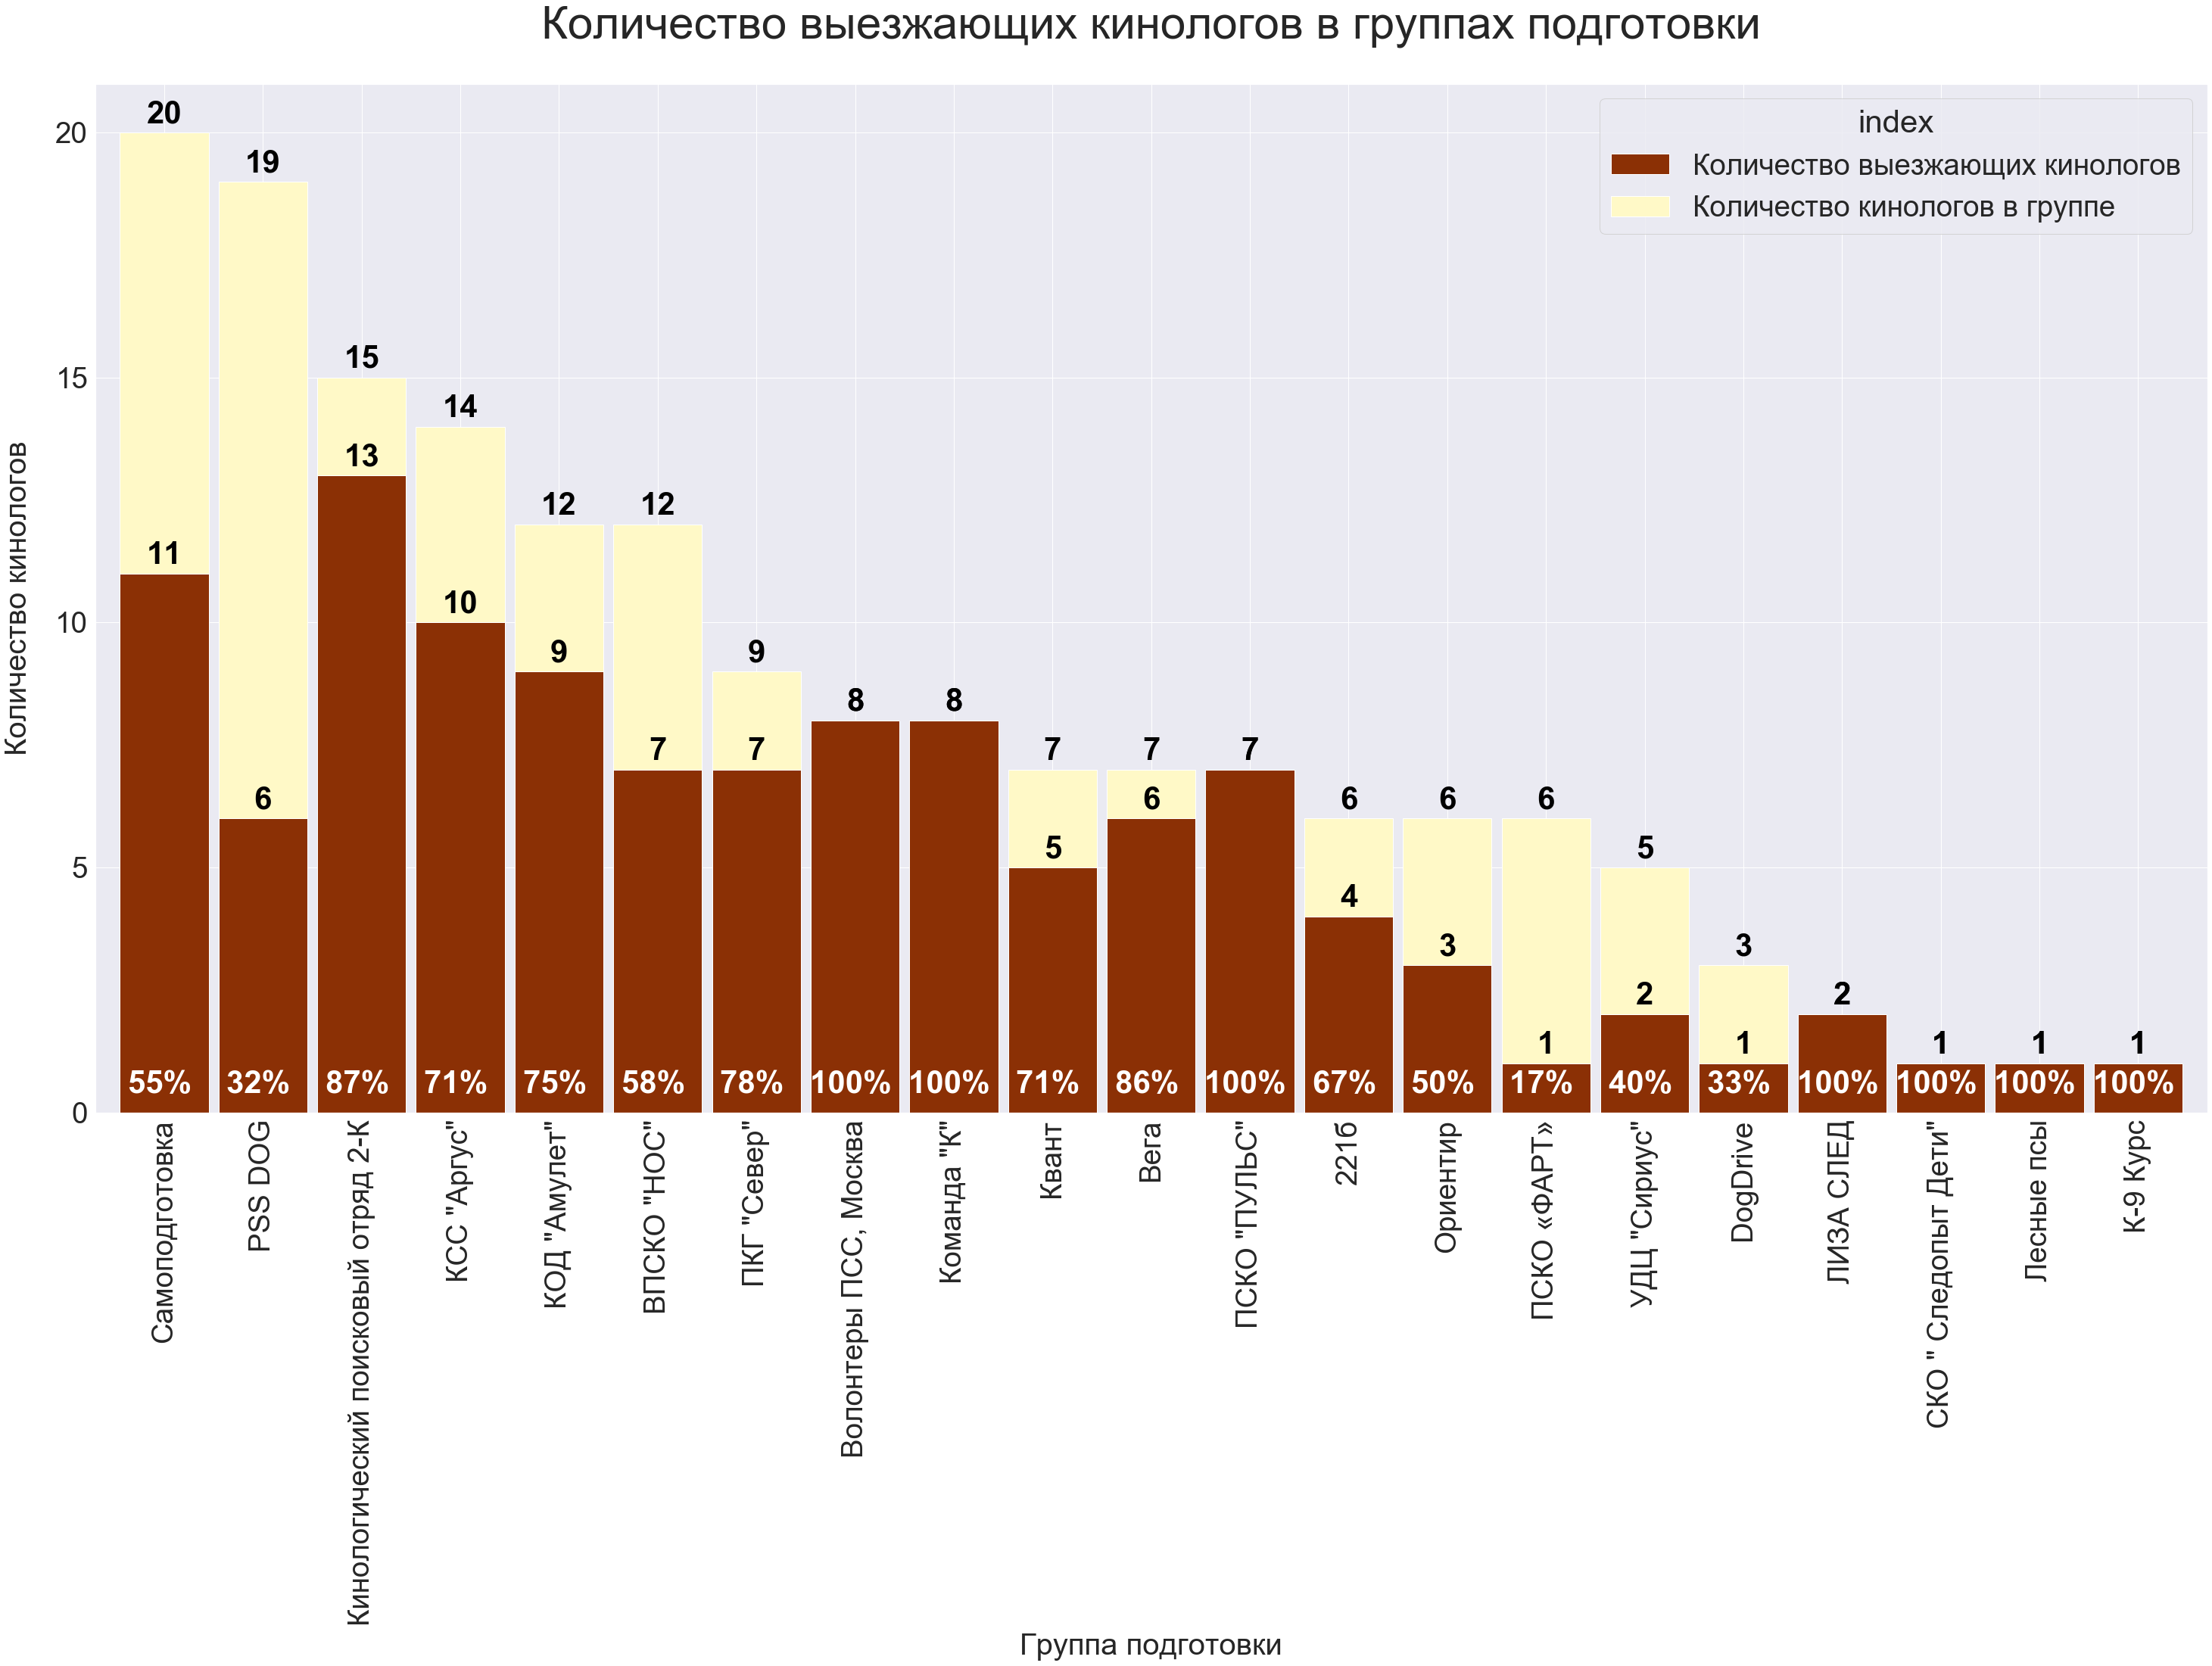

In [59]:
sns.set(font_scale = 3.5)

bars = ddf_act_kin_group_merge_ .T.plot(kind='bar', width = 0.9, stacked=True,
          colormap=ListedColormap(sns.color_palette("YlOrBr_r", 10)), 
          figsize=(50,25))

# Add labels to each bar.
for i, tot in enumerate(totals):
    bars.text(i, tot + 0.2, round(tot),
          ha = 'center', weight = 'bold', color = 'black')
    
for i, tot in enumerate(totals_act):
    bars.text(i, tot + 0.2, round(tot),
          ha = 'center', weight = 'bold', color = 'black')
    
for i, tot in enumerate(totals_act_perc):
    value = '{:.0f}% '. format (tot)
    bars.text(i, 0.4, value,
          ha = 'center', weight = 'bold', color = 'white')
        

    

    

bars.axes.set_title('Количество выезжающих кинологов в группах подготовки', fontsize=60, y = 1.04) 

bars.set_xlabel('Группа подготовки', fontsize=40, labelpad = 10) #название оси Х

bars.set_ylabel('Количество кинологов', fontsize=40, labelpad = 30) #название оси Y

plt.xticks(rotation=90) #поворот значений по оси Х

plt.yticks(range(0,25,5))

plt.show() #показываем диаграмму 

В активных группах всего насчитывается 169 кинологов, 113 из которых (67%) активно выезжали на поиски в 2023 году. 

### <a id="title10">3.4 Статус аттестации в группах подготовки</a>

In [60]:
df_kinologist_msc_ = df_kinologist_msc.copy()

df_kinologist_msc_['Статус аттестации'] = df_kinologist_msc_['Специализация'] + str(' ') + df_kinologist_msc_['Допуск']

df_kinologist_msc_ = df_kinologist_msc_.drop(['Специализация', 'Допуск'], axis = 1)


df_kinologist_msc_.head()

,Проводник,Регион,Группа подготовки,Статус аттестации
0,Алина Абдрахимова,Москва и МО,"ПСКО ""ПУЛЬС""",ПСС Расчет не проверен
1,Оксана Абрамочкина,Москва и МО,Кинологический поисковый отряд 2-К,ПСС Расчет не проверен
2,Евгения Авдалян,Москва и МО,Самоподготовка,ПСС Расчет не проверен
3,Евгения Авдеева,Москва и МО,"ПКГ ""Север""",ПСС Расчет не проверен
8,Елизавета Аксенова,Москва и МО,DogDrive,ПСС Расчет не проверен


In [61]:
df_kinologist_msc_.query("Проводник == 'Юлия Кеслер'")

,Проводник,Регион,Группа подготовки,Статус аттестации
182,Юлия Кеслер,Москва и МО,"Команда ""К""",ПТП Расчет не проверен
183,Юлия Кеслер,Москва и МО,"Команда ""К""",ПТП Гнилостные останки: допущен до длительных ...
184,Юлия Кеслер,Москва и МО,"КОД ""Амулет""",ПСС Поиск В: Допущен до длительных и автономны...


In [62]:
#Посчитаем количество КР с различным статусом аттестации в группах подготовки

df_kinologist_groups_att_msc =  df_kinologist_msc_.groupby(['Группа подготовки', 'Статус аттестации']).agg({'Проводник':'count'})\
.rename(columns = {'Проводник':'Количество КР'}).reset_index()

df_kinologist_groups_att_msc

,Группа подготовки,Статус аттестации,Количество КР
0,221б,ПСС Поиск А: Допущен до коротких задач,2
1,221б,ПСС Расчет не проверен,4
2,221б,ПСС Тестирование: Допущен в усиление,2
3,DogDrive,ПСС Расчет не проверен,3
4,DogDrive,ПСС Тестирование: Допущен в усиление,1
...,...,...,...
58,Самоподготовка,След Расчет не проверен,4
59,Самоподготовка,"След Успешно прошел этап А, допущен до ПСР",1
60,"УДЦ ""Сириус""",ПСС Расчет не проверен,4
61,"УДЦ ""Сириус""",ПСС Тестирование: Допущен в усиление,2


In [63]:
df_kinologist_groups_att_msc_ = df_kinologist_groups_att_msc.pivot_table(index = ['Статус аттестации'],
                     columns = 'Группа подготовки',
                     values = 'Количество КР',
                     aggfunc = 'sum',
                     fill_value = 0).reset_index().copy()

ddf_kinologist_groups_att_msc_  = df_kinologist_groups_att_msc_ .set_index('Статус аттестации')\
  .reindex(df_kinologist_groups_att_msc_.set_index('Статус аттестации').sum().sort_values(ascending=False).index, axis=1)

ddf_kinologist_groups_att_msc_

Группа подготовки,Самоподготовка,PSS DOG,Кинологический поисковый отряд 2-К,"КСС ""Аргус""","КОД ""Амулет""","ВПСКО ""НОС""","Волонтеры ПСС, Москва","ПСКО ""ПУЛЬС""","ПКГ ""Север""","Команда ""К""",...,Ориентир,DogDrive,ЛИЗА СЛЕД,К9 ЛА Клин,К-9 Курс,Лесные псы,"КССС ""Варяг""",К9 ЛА Ярославской области,"СКО "" Следопыт Дети""","ФГКУ ""ЦСООР ""Лидер"""
Статус аттестации,,,,,,,,,,,,,,,,,,,,,
ПСС Поиск А: Допущен до коротких задач,1,0,0,6,4,2,0,2,1,0,...,0,0,0,0,2,0,0,0,0,0
ПСС Поиск В: Допущен до длительных и автономных зачач,0,1,0,0,1,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ПСС Прошел тестирование неполностью,0,1,0,0,1,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
ПСС Расчет не проверен,8,17,8,7,5,6,7,8,6,0,...,0,3,0,3,0,1,0,1,0,1
ПСС Тестирование: Допущен в усиление,0,1,2,3,3,1,0,1,3,0,...,0,1,0,0,0,1,0,0,0,0
ПТП Гнилостные останки: допущен до длительных и автономных задач,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
ПТП Расчет не проверен,10,0,7,0,0,0,5,0,0,7,...,0,0,2,0,0,0,0,0,0,0
След Допущен в тестовом режиме,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
След Расчет не проверен,4,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,1,0,0,0


In [64]:
totals = ddf_kinologist_groups_att_msc_.sum(axis=0)

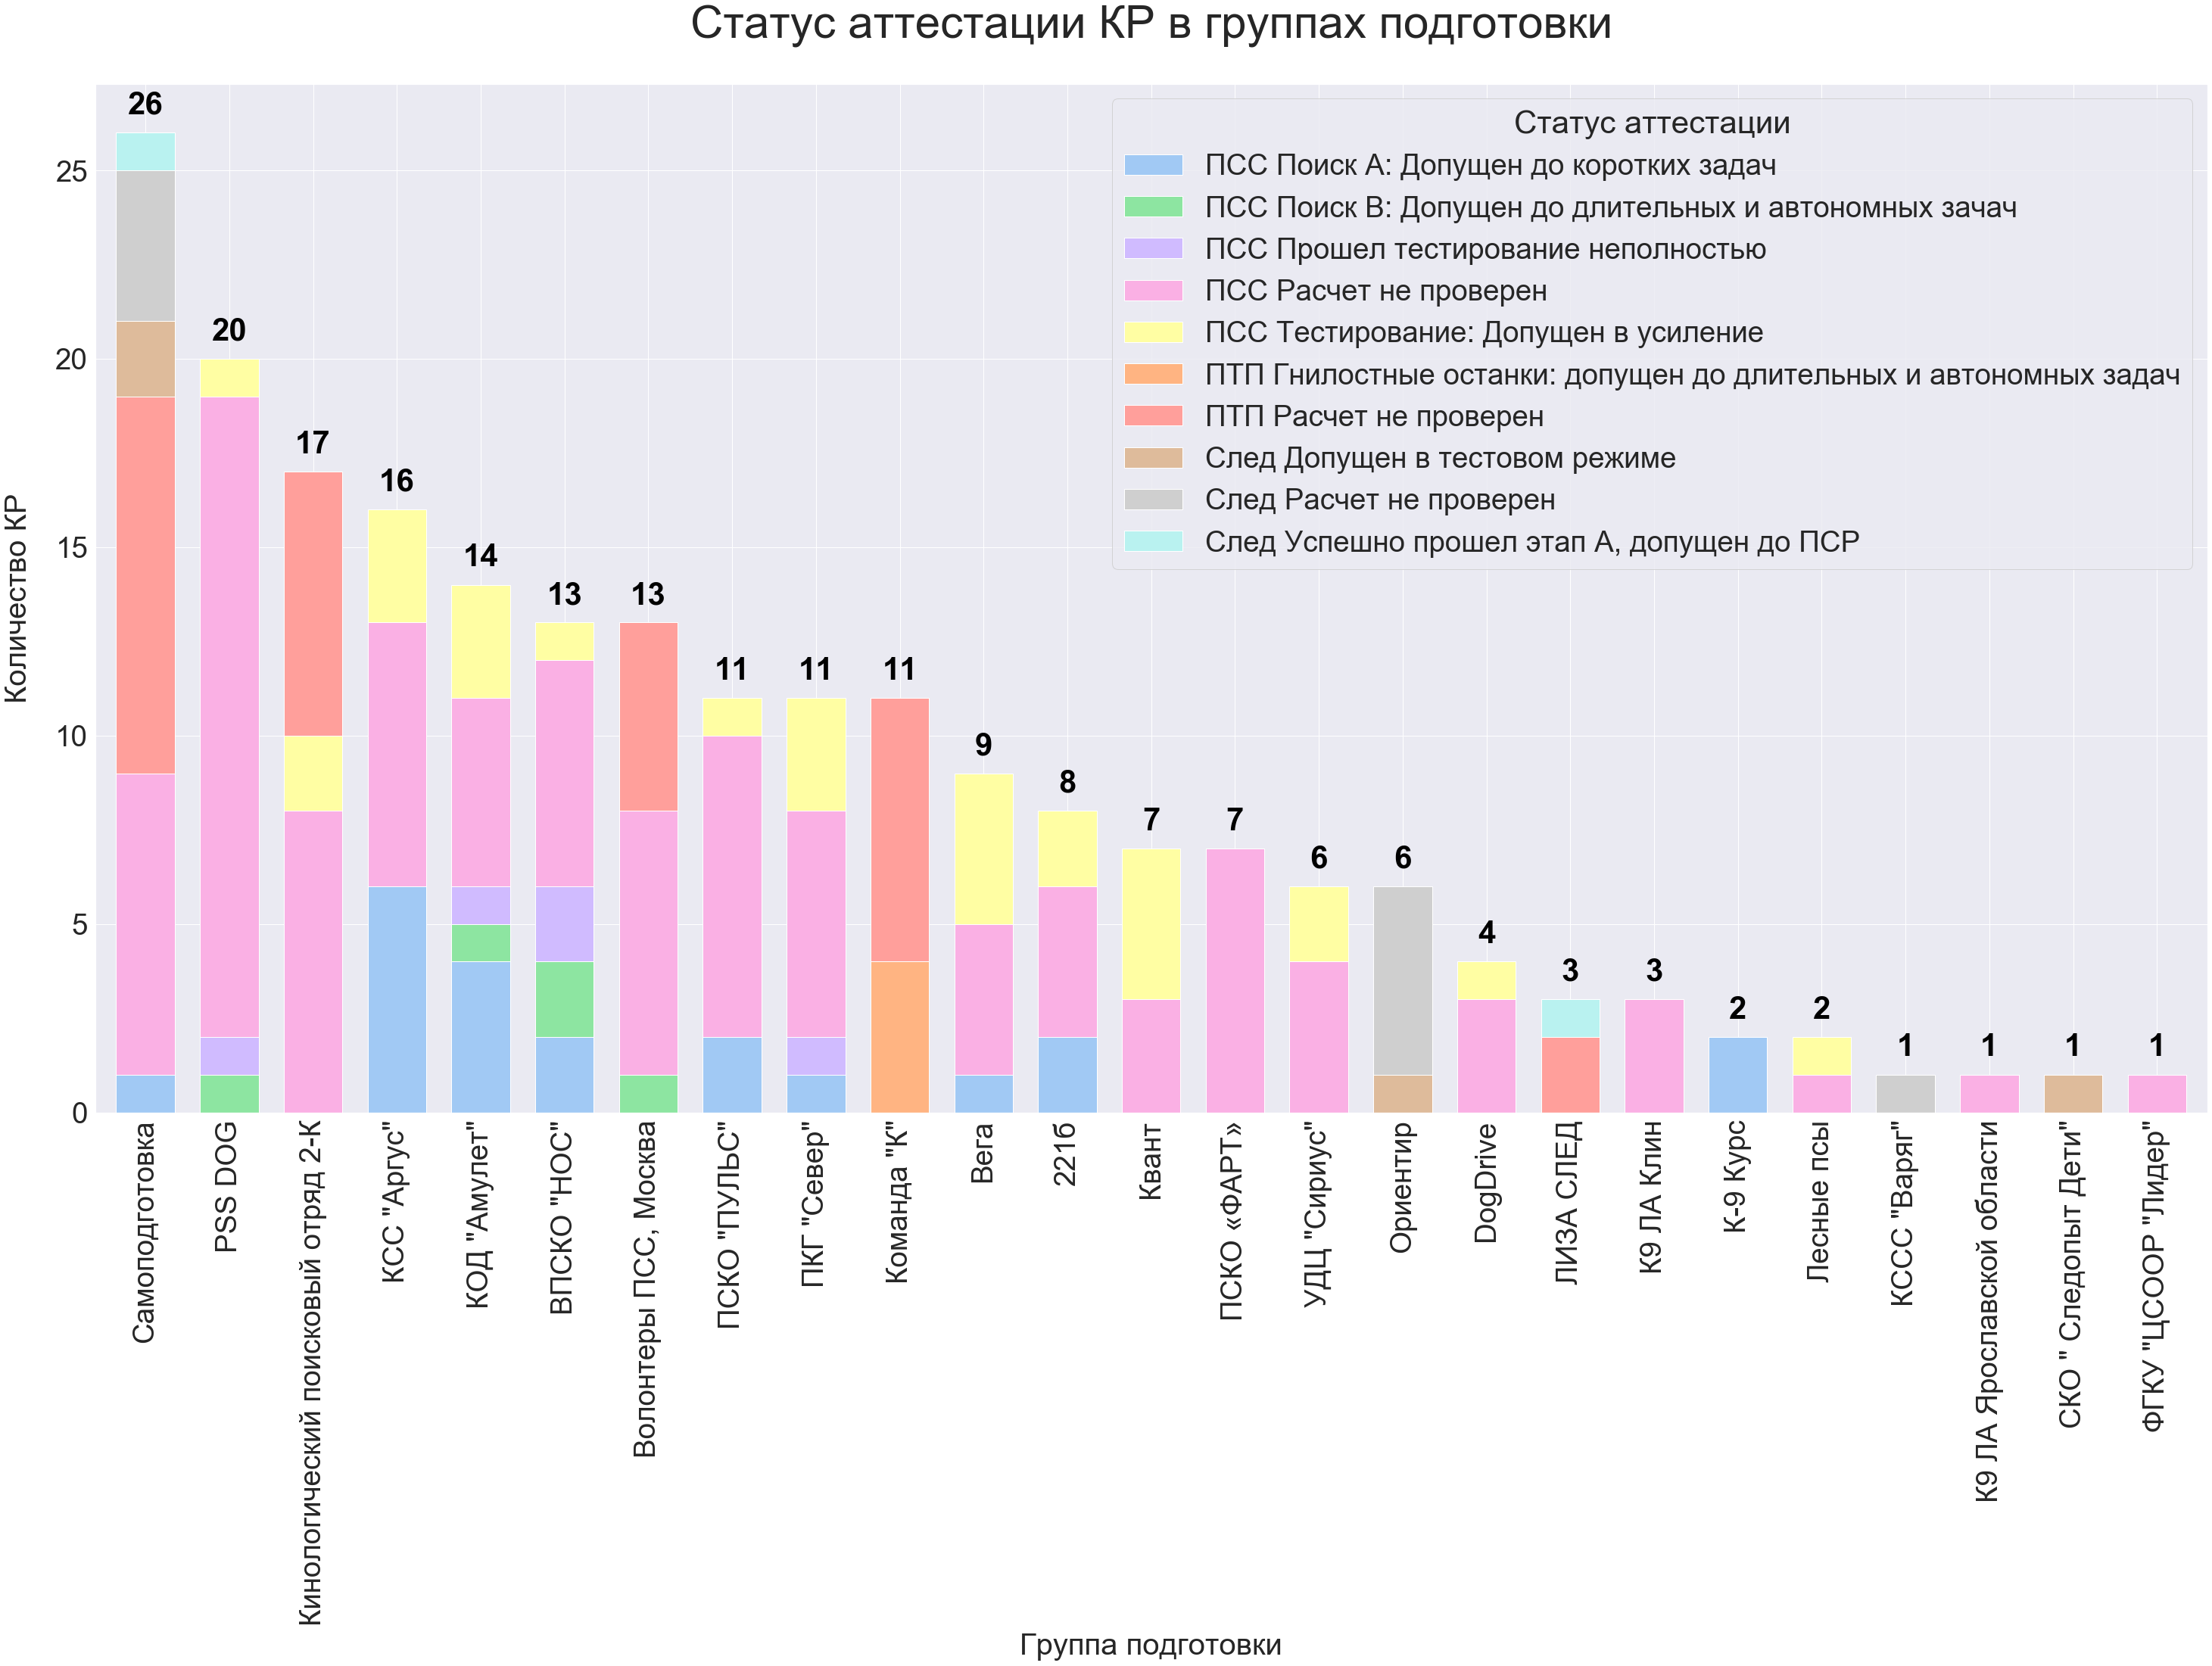

In [65]:
sns.set(font_scale = 3.5)

bars = ddf_kinologist_groups_att_msc_.T.plot(kind='bar', width = 0.7, stacked=True,
          colormap=ListedColormap(sns.color_palette("pastel", 20)), 
          figsize=(50,25))

# Add labels to each bar.
for i, tot in enumerate(totals):
    bars.text(i, tot + 0.5, round(tot),
          ha = 'center', weight = 'bold', color = 'black')

bars.axes.set_title('Статус аттестации КР в группах подготовки', fontsize=60, y = 1.04) 

bars.set_xlabel('Группа подготовки', fontsize=40, labelpad = 10) #название оси Х

bars.set_ylabel('Количество КР', fontsize=40, labelpad = 30) #название оси Y

plt.xticks(rotation=90) #поворот значений по оси Х

plt.show() #показываем диаграмму 

#### 3.4.1 Статус аттестации в группах подготовки (ПСС)

In [66]:
#Отберем специализацию ПСС из общего ДФ по группам

ddf_kinologist_groups_att_msc_PSS =df_kinologist_groups_att_msc[df_kinologist_groups_att_msc['Статус аттестации']\
                                                                .str.contains('ПСС')]


ddf_kinologist_groups_att_msc_PSS

,Группа подготовки,Статус аттестации,Количество КР
0,221б,ПСС Поиск А: Допущен до коротких задач,2
1,221б,ПСС Расчет не проверен,4
2,221б,ПСС Тестирование: Допущен в усиление,2
3,DogDrive,ПСС Расчет не проверен,3
4,DogDrive,ПСС Тестирование: Допущен в усиление,1
5,PSS DOG,ПСС Поиск В: Допущен до длительных и автономны...,1
6,PSS DOG,ПСС Прошел тестирование неполностью,1
7,PSS DOG,ПСС Расчет не проверен,17
8,PSS DOG,ПСС Тестирование: Допущен в усиление,1
9,"ВПСКО ""НОС""",ПСС Поиск А: Допущен до коротких задач,2


In [67]:
#Рассмотрим только те КР, которые имеют минимальный допуск до ПСР

min_att = ddf_kinologist_groups_att_msc_PSS[ddf_kinologist_groups_att_msc_PSS['Статус аттестации'] != 'ПСС Расчет не проверен']

min_att

,Группа подготовки,Статус аттестации,Количество КР
0,221б,ПСС Поиск А: Допущен до коротких задач,2
2,221б,ПСС Тестирование: Допущен в усиление,2
4,DogDrive,ПСС Тестирование: Допущен в усиление,1
5,PSS DOG,ПСС Поиск В: Допущен до длительных и автономны...,1
6,PSS DOG,ПСС Прошел тестирование неполностью,1
8,PSS DOG,ПСС Тестирование: Допущен в усиление,1
9,"ВПСКО ""НОС""",ПСС Поиск А: Допущен до коротких задач,2
10,"ВПСКО ""НОС""",ПСС Поиск В: Допущен до длительных и автономны...,2
11,"ВПСКО ""НОС""",ПСС Прошел тестирование неполностью,2
13,"ВПСКО ""НОС""",ПСС Тестирование: Допущен в усиление,1


In [68]:
#всего КР по специализации ПСС

ddf_kinologist_groups_att_msc_PSS['Количество КР'].sum()

162

In [69]:
#Количество КР с минимальным допуском до ПСР

min_att['Количество КР'].sum()

59

In [70]:
#процент КР с минимальным допуском до ПСР

min_att['Количество КР'].sum()*100/ddf_kinologist_groups_att_msc_PSS['Количество КР'].sum()

36.41975308641975

In [71]:
df_kinologist_groups_att_msc_PSS = ddf_kinologist_groups_att_msc_PSS.pivot_table(index = ['Статус аттестации'],
                     columns = 'Группа подготовки',
                     values = 'Количество КР',
                     aggfunc = 'sum',
                     fill_value = 0).reset_index().copy()

ddf_kinologist_groups_att_msc_PSS_  = df_kinologist_groups_att_msc_PSS .set_index('Статус аттестации')\
  .reindex(df_kinologist_groups_att_msc_PSS.set_index('Статус аттестации').sum().sort_values(ascending=False).index, axis=1)

ddf_kinologist_groups_att_msc_PSS_

Группа подготовки,PSS DOG,"КСС ""Аргус""","КОД ""Амулет""","ВПСКО ""НОС""","ПСКО ""ПУЛЬС""","ПКГ ""Север""",Кинологический поисковый отряд 2-К,Самоподготовка,Вега,"Волонтеры ПСС, Москва",221б,Квант,ПСКО «ФАРТ»,"УДЦ ""Сириус""",DogDrive,К9 ЛА Клин,К-9 Курс,Лесные псы,К9 ЛА Ярославской области,"ФГКУ ""ЦСООР ""Лидер"""
Статус аттестации,,,,,,,,,,,,,,,,,,,,
ПСС Поиск А: Допущен до коротких задач,0,6,4,2,2,1,0,1,1,0,2,0,0,0,0,0,2,0,0,0
ПСС Поиск В: Допущен до длительных и автономных зачач,1,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
ПСС Прошел тестирование неполностью,1,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ПСС Расчет не проверен,17,7,5,6,8,6,8,8,4,7,4,3,7,4,3,3,0,1,1,1
ПСС Тестирование: Допущен в усиление,1,3,3,1,1,3,2,0,4,0,2,4,0,2,1,0,0,1,0,0


In [72]:
totals = ddf_kinologist_groups_att_msc_PSS_.sum(axis=0)

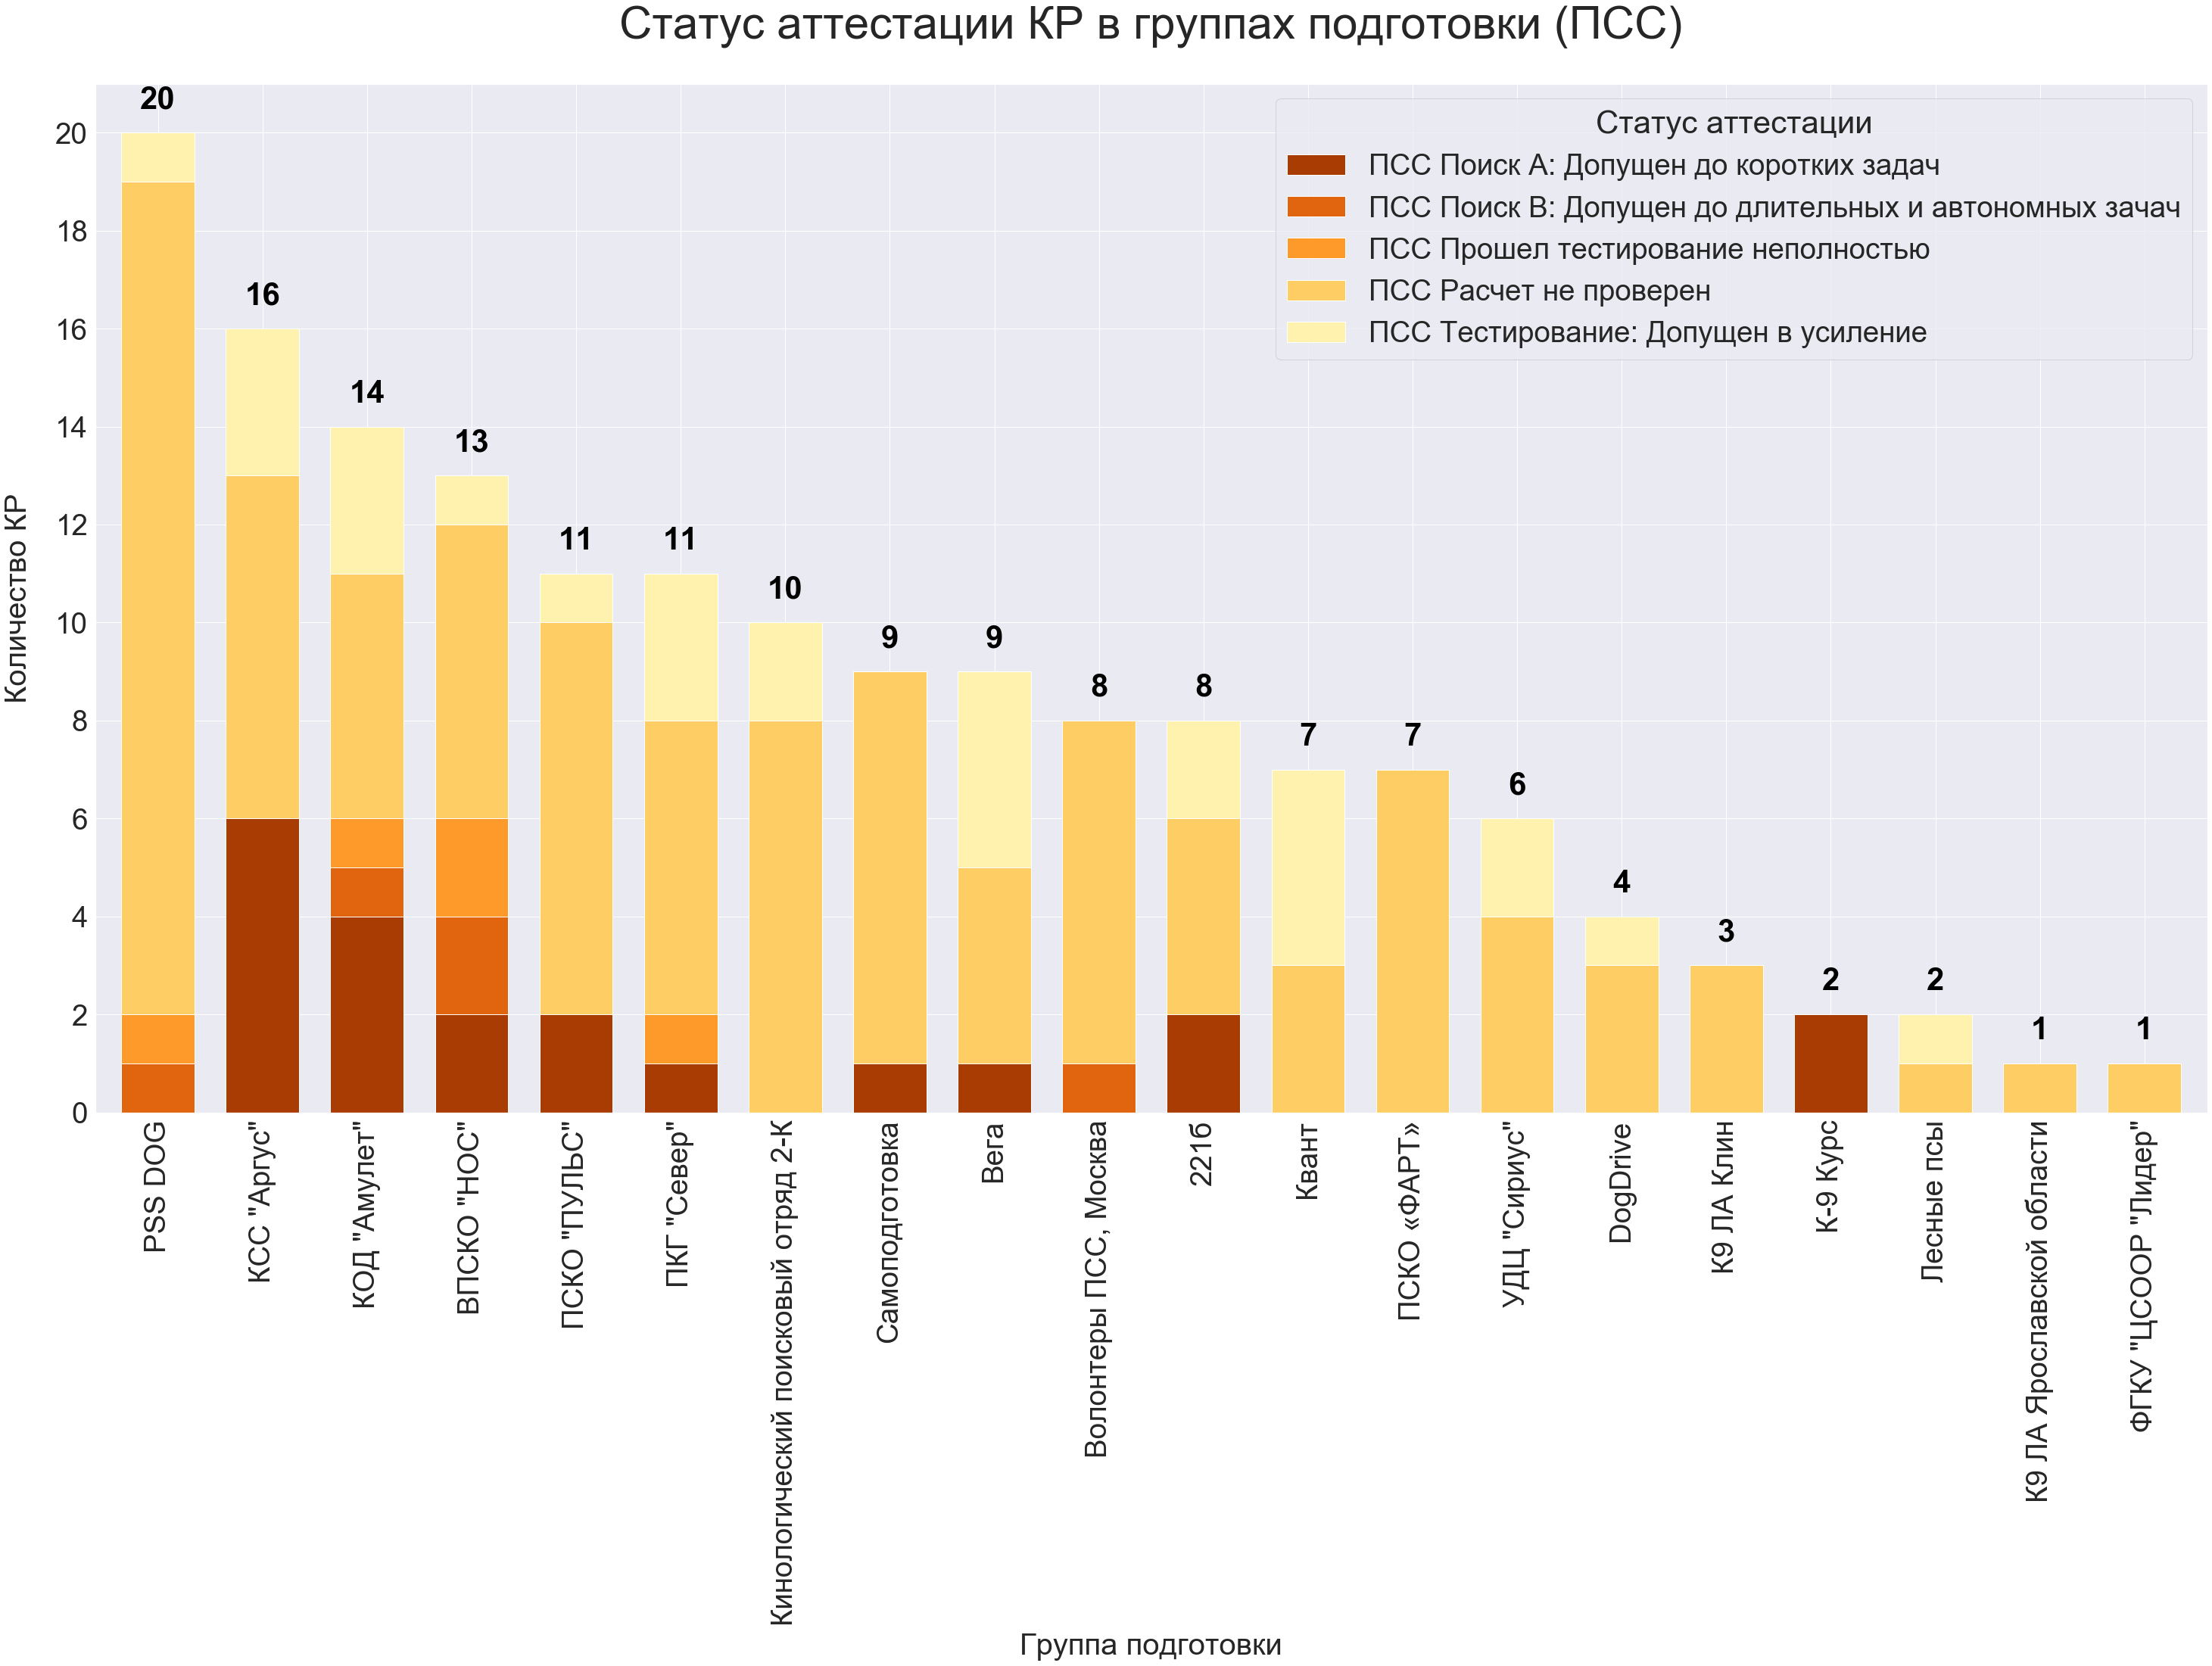

In [73]:
sns.set(font_scale = 3.5)

bars = ddf_kinologist_groups_att_msc_PSS_.T.plot(kind='bar', width = 0.7, stacked=True,
          colormap=ListedColormap(sns.color_palette("YlOrBr_r", 5)), 
          figsize=(50,25))

# Add labels to each bar.
for i, tot in enumerate(totals):
    bars.text(i, tot + 0.5, round(tot),
          ha = 'center', weight = 'bold', color = 'black')

bars.axes.set_title('Статус аттестации КР в группах подготовки (ПСС)', fontsize=60, y = 1.04) 

bars.set_xlabel('Группа подготовки', fontsize=40, labelpad = 10) #название оси Х

bars.set_ylabel('Количество КР', fontsize=40, labelpad = 30) #название оси Y

plt.xticks(rotation=90) #поворот значений по оси Х

plt.yticks(range(0,22,2))

plt.show() #показываем диаграмму 

Посчитаем количество аттестованных КР по специализации ПСС

In [74]:
#отберем те КР, которые имеют аттестацию класса А или В по специализации ПСС

df_kinologist_PSS_AB_group_msc = df_kinologist_msc.query("Допуск == 'Поиск А: Допущен до коротких задач' | Допуск == 'Поиск В: Допущен до длительных и автономных зачач'")

df_kinologist_PSS_AB_group_msc

,Проводник,Регион,Специализация,Допуск,Группа подготовки
17,Анастасия АпухтинаАгеичкина,Москва и МО,ПСС,Поиск В: Допущен до длительных и автономных зачач,"Волонтеры ПСС, Москва"
40,Ирина Беляева,Москва и МО,ПСС,Поиск А: Допущен до коротких задач,"КСС ""Аргус"""
98,Ольга Давыдова,Москва и МО,ПСС,Поиск А: Допущен до коротких задач,"КСС ""Аргус"""
99,Алена Данилова,Москва и МО,ПСС,Поиск А: Допущен до коротких задач,"ПСКО ""ПУЛЬС"""
115,Инга Древаль,Москва и МО,ПСС,Поиск А: Допущен до коротких задач,"КОД ""Амулет"""
149,Ян Зоммер,Москва и МО,ПСС,Поиск А: Допущен до коротких задач,"КСС ""Аргус"""
153,Александра Зотова,Москва и МО,ПСС,Поиск А: Допущен до коротких задач,К-9 Курс
154,Александра Зотова,Москва и МО,ПСС,Поиск А: Допущен до коротких задач,К-9 Курс
179,Мария Карпук,Москва и МО,ПСС,Поиск А: Допущен до коротких задач,"КОД ""Амулет"""
184,Юлия Кеслер,Москва и МО,ПСС,Поиск В: Допущен до длительных и автономных зачач,"КОД ""Амулет"""


In [75]:
#число аттестованных КР в Москве и МО (ПСС)

df_kinologist_PSS_AB_group_msc['Проводник'].count()

26

In [76]:
#процент аттестованных КР от всех КР (ПСС)

df_kinologist_PSS_AB_group_msc['Проводник'].count()*100/ddf_kinologist_groups_att_msc_PSS['Количество КР'].sum()

16.049382716049383

In [77]:
df_kinologist_PSS_AB_group_msc_ = df_kinologist_PSS_AB_group_msc.groupby(['Группа подготовки', 'Допуск']).agg({'Проводник':'count'})\
.rename(columns = {'Проводник':'Количество КР'}).sort_values(['Количество КР'], ascending = False).reset_index()

df_kinologist_PSS_AB_group_msc_

,Группа подготовки,Допуск,Количество КР
0,"КСС ""Аргус""",Поиск А: Допущен до коротких задач,6
1,"КОД ""Амулет""",Поиск А: Допущен до коротких задач,4
2,221б,Поиск А: Допущен до коротких задач,2
3,"ВПСКО ""НОС""",Поиск А: Допущен до коротких задач,2
4,"ВПСКО ""НОС""",Поиск В: Допущен до длительных и автономных зачач,2
5,К-9 Курс,Поиск А: Допущен до коротких задач,2
6,"ПСКО ""ПУЛЬС""",Поиск А: Допущен до коротких задач,2
7,PSS DOG,Поиск В: Допущен до длительных и автономных зачач,1
8,Вега,Поиск А: Допущен до коротких задач,1
9,"Волонтеры ПСС, Москва",Поиск В: Допущен до длительных и автономных зачач,1


In [78]:
ddf_kinologist_PSS_AB_group_msc = df_kinologist_PSS_AB_group_msc_.pivot_table(index = ['Допуск'],
                     columns = 'Группа подготовки',
                     values = 'Количество КР',
                     aggfunc = 'sum',
                     fill_value = 0).reset_index().copy()

ddf_kinologist_PSS_AB_group_  = ddf_kinologist_PSS_AB_group_msc.set_index('Допуск')\
  .reindex(ddf_kinologist_PSS_AB_group_msc.set_index('Допуск').sum().sort_values(ascending=False).index, axis=1)

ddf_kinologist_PSS_AB_group_

Группа подготовки,"КСС ""Аргус""","КОД ""Амулет""","ВПСКО ""НОС""","ПСКО ""ПУЛЬС""",К-9 Курс,221б,Самоподготовка,"ПКГ ""Север""","Волонтеры ПСС, Москва",Вега,PSS DOG
Допуск,,,,,,,,,,,
Поиск А: Допущен до коротких задач,6,4,2,2,2,2,1,1,0,1,0
Поиск В: Допущен до длительных и автономных зачач,0,1,2,0,0,0,0,0,1,0,1


In [79]:
totals = ddf_kinologist_PSS_AB_group_.sum(axis=0)

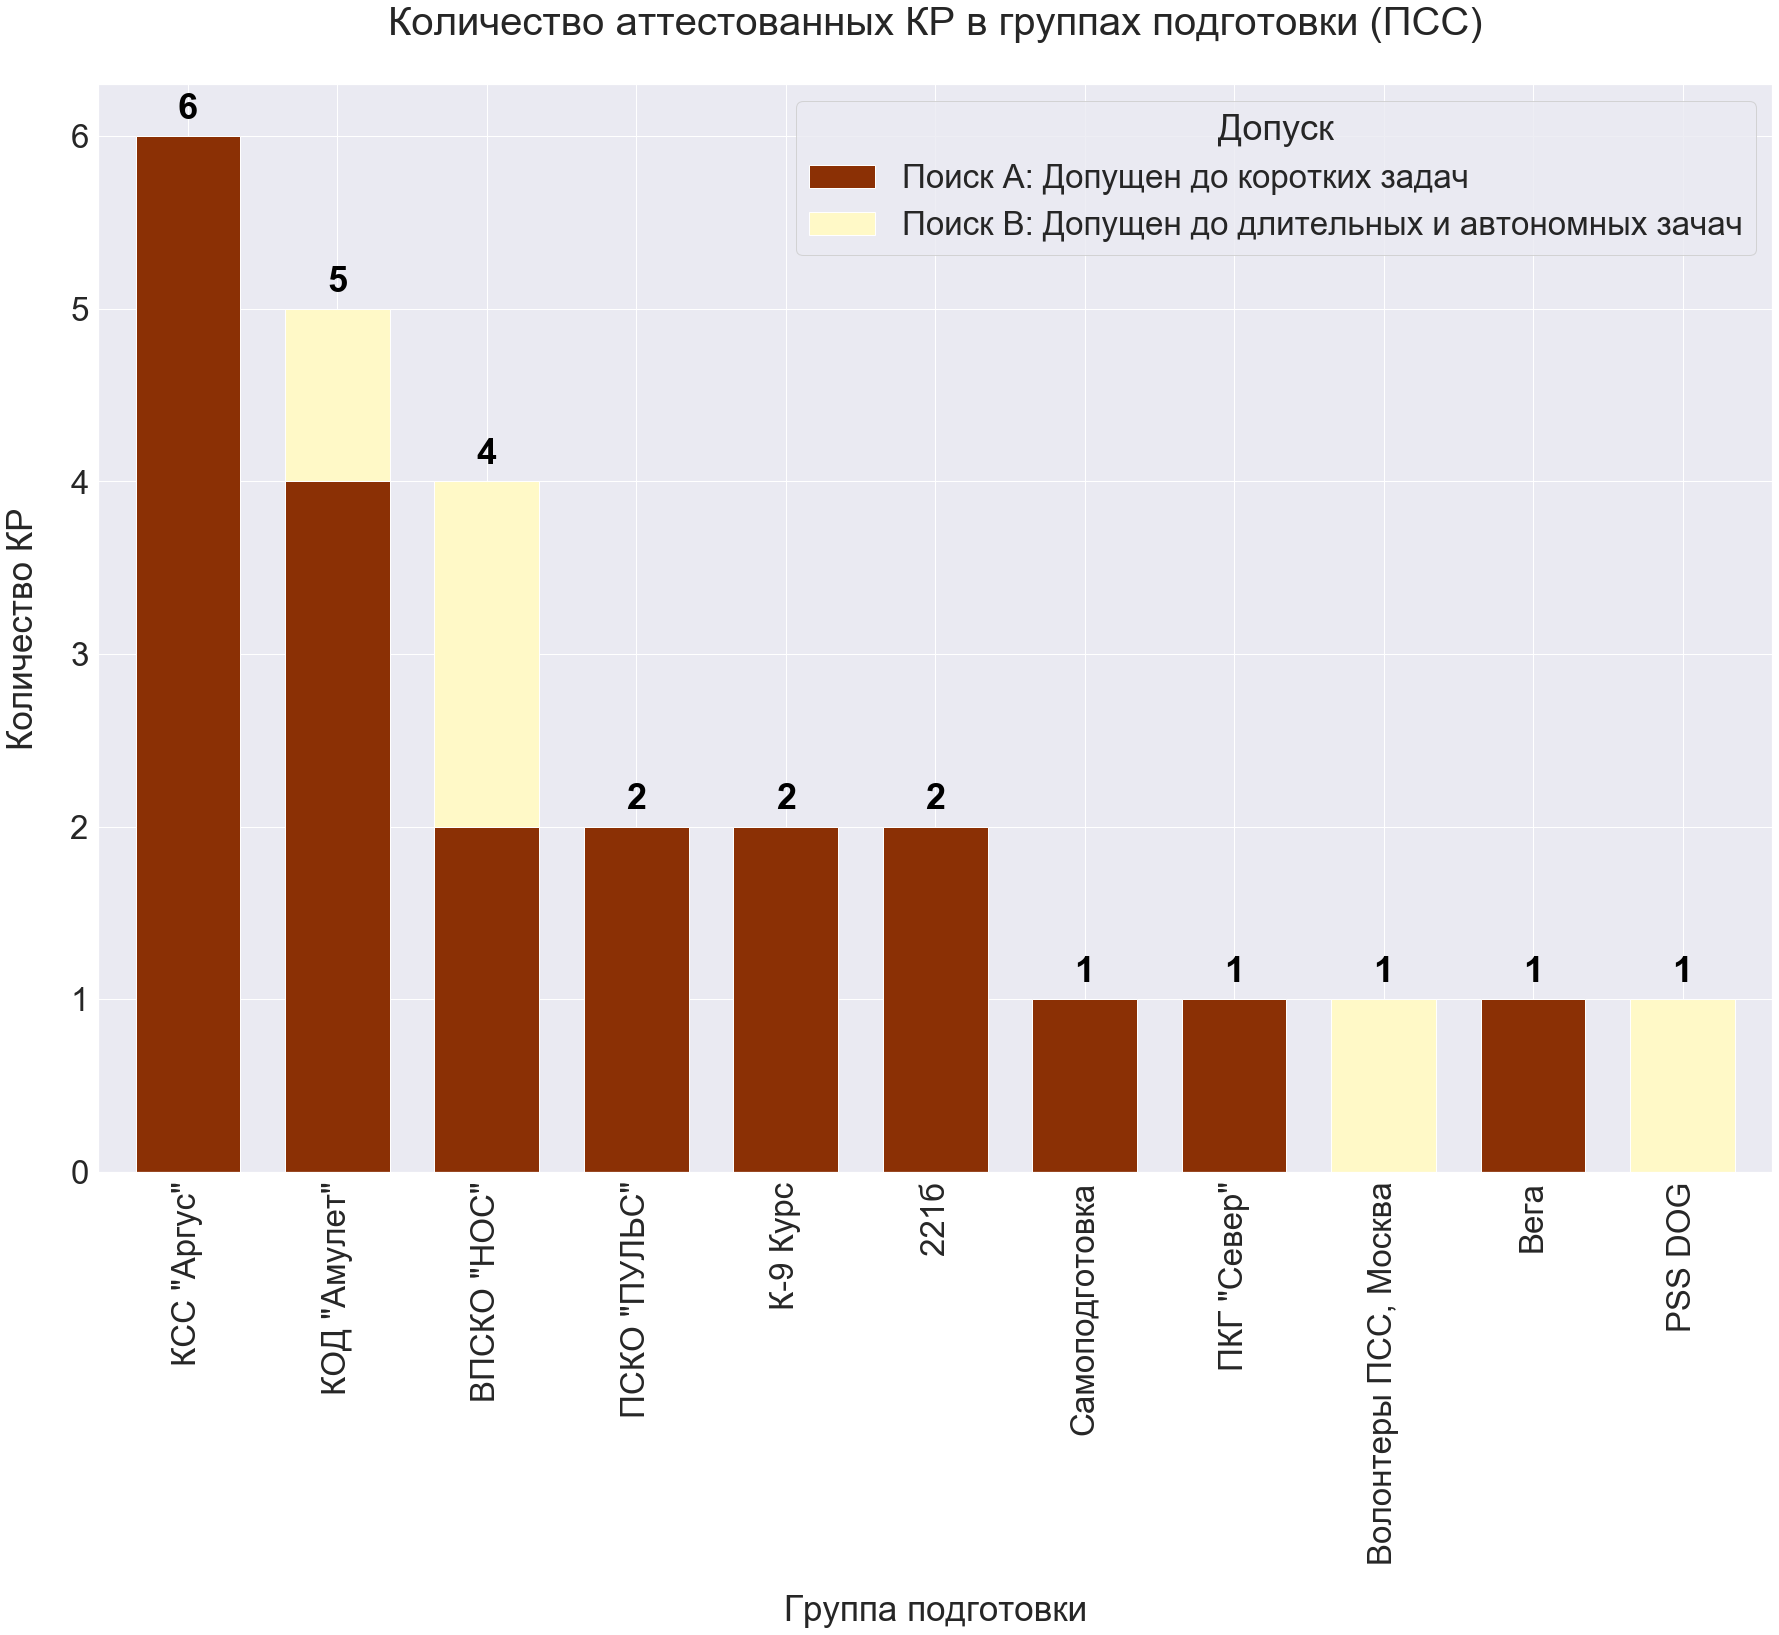

In [80]:
sns.set(font_scale = 3)

bars = ddf_kinologist_PSS_AB_group_.T.plot(kind='bar', width = 0.7, stacked=True,
          colormap=ListedColormap(sns.color_palette("YlOrBr_r", 10)), 
          figsize=(30,20))

# Add labels to each bar.
for i, tot in enumerate(totals):
    bars.text(i, tot + 0.1, round(tot),
          ha = 'center', weight = 'bold', color = 'black')

bars.axes.set_title('Количество аттестованных КР в группах подготовки (ПСС)', fontsize=40, y = 1.04) 

bars.set_xlabel('Группа подготовки', fontsize=35, labelpad = 30) #название оси Х

bars.set_ylabel('Количество КР', fontsize=35, labelpad = 30) #название оси Y

plt.xticks(rotation=90) #поворот значений по оси Х

plt.show() #показываем диаграмму 

По специализации ПСС в активных группах насчитывается 162 КР, из которых 59 КР (36 %) имеют минимальный допуск до ПСР, а также             
26 КР (16 %) – аттестованы (ПСС А/В).

#### 3.4.2 Статус аттестации в группах подготовки (ПТП)

In [81]:
#Из общей таблицы по группам отберем специализацию ПТП

ddf_kinologist_groups_att_msc_PTP =ddf_kinologist_groups_att_msc_PSS =df_kinologist_groups_att_msc[df_kinologist_groups_att_msc['Статус аттестации']\
                                                                .str.contains('ПТП')]
ddf_kinologist_groups_att_msc_PTP

,Группа подготовки,Статус аттестации,Количество КР
19,"Волонтеры ПСС, Москва",ПТП Расчет не проверен,5
36,Кинологический поисковый отряд 2-К,ПТП Расчет не проверен,7
37,"Команда ""К""",ПТП Гнилостные останки: допущен до длительных ...,4
38,"Команда ""К""",ПТП Расчет не проверен,7
39,ЛИЗА СЛЕД,ПТП Расчет не проверен,2
56,Самоподготовка,ПТП Расчет не проверен,10


In [82]:
df_kinologist_groups_att_msc_PTP = ddf_kinologist_groups_att_msc_PTP.pivot_table(index = ['Статус аттестации'],
                     columns = 'Группа подготовки',
                     values = 'Количество КР',
                     aggfunc = 'sum',
                     fill_value = 0).reset_index().copy()

ddf_kinologist_groups_att_msc_PTP_  = df_kinologist_groups_att_msc_PTP .set_index('Статус аттестации')\
  .reindex(df_kinologist_groups_att_msc_PTP.set_index('Статус аттестации').sum().sort_values(ascending=False).index, axis=1)

ddf_kinologist_groups_att_msc_PTP_

Группа подготовки,"Команда ""К""",Самоподготовка,Кинологический поисковый отряд 2-К,"Волонтеры ПСС, Москва",ЛИЗА СЛЕД
Статус аттестации,,,,,
ПТП Гнилостные останки: допущен до длительных и автономных задач,4,0,0,0,0
ПТП Расчет не проверен,7,10,7,5,2


In [83]:
totals = ddf_kinologist_groups_att_msc_PTP_.sum(axis=0)

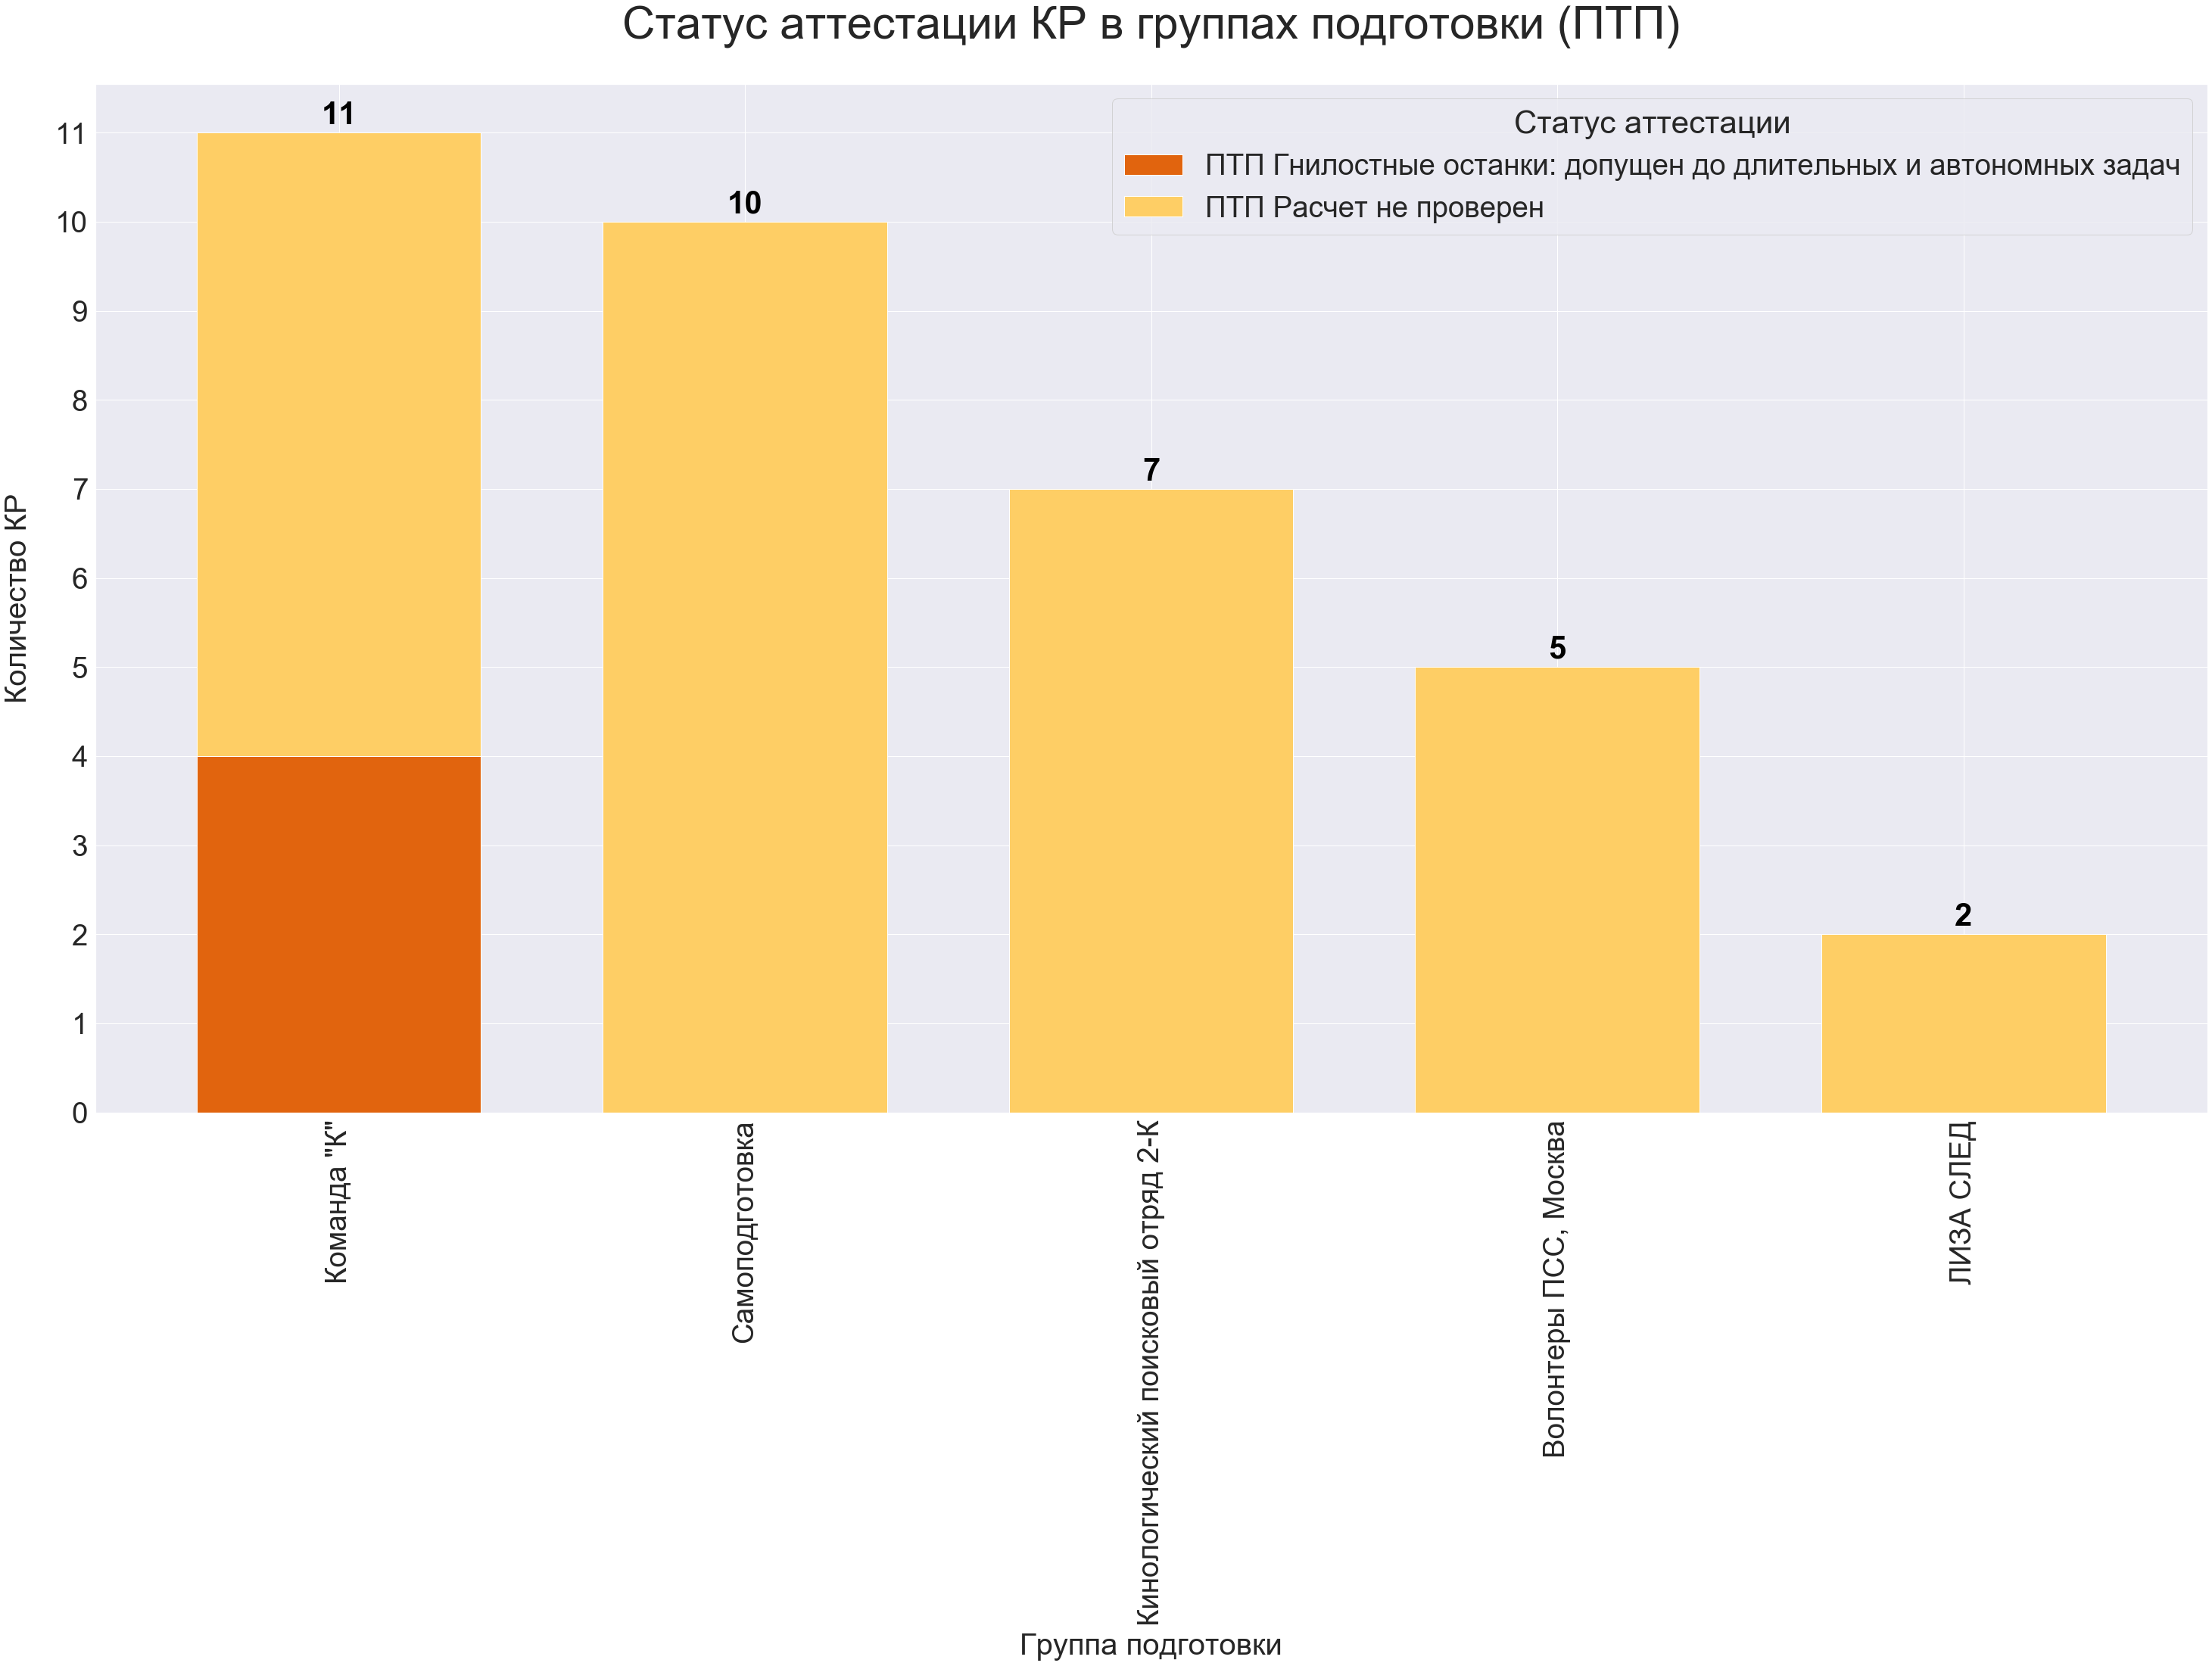

In [84]:
sns.set(font_scale = 3.5)

bars = ddf_kinologist_groups_att_msc_PTP_.T.plot(kind='bar', width = 0.7, stacked=True,
          colormap=ListedColormap(sns.color_palette("YlOrBr_r", 2)), 
          figsize=(50,25))

# Add labels to each bar.
for i, tot in enumerate(totals):
    bars.text(i, tot + 0.1, round(tot),
          ha = 'center', weight = 'bold', color = 'black')

bars.axes.set_title('Статус аттестации КР в группах подготовки (ПТП)', fontsize=60, y = 1.04) 

bars.set_xlabel('Группа подготовки', fontsize=40, labelpad = 10) #название оси Х

bars.set_ylabel('Количество КР', fontsize=40, labelpad = 30) #название оси Y

plt.xticks(rotation=90) #поворот значений по оси Х

plt.yticks(range(0,12,1))

plt.show() #показываем диаграмму 

По специализации ПТП в активных группах насчитывается 35 КР, из которых 4 КР имеют допуск до длительных автономных задач.


#### 3.4.3 Статус аттестации в группах подготовки (След)

In [85]:
#Из общей таблицы по группам отберем специализацию След


ddf_kinologist_groups_att_msc_sled =ddf_kinologist_groups_att_msc_PSS =df_kinologist_groups_att_msc[df_kinologist_groups_att_msc['Статус аттестации']\
                                                                .str.contains('След')]

ddf_kinologist_groups_att_msc_sled

,Группа подготовки,Статус аттестации,Количество КР
31,"КССС ""Варяг""",След Расчет не проверен,1
40,ЛИЗА СЛЕД,"След Успешно прошел этап А, допущен до ПСР",1
43,Ориентир,След Допущен в тестовом режиме,1
44,Ориентир,След Расчет не проверен,5
53,"СКО "" Следопыт Дети""",След Допущен в тестовом режиме,1
57,Самоподготовка,След Допущен в тестовом режиме,2
58,Самоподготовка,След Расчет не проверен,4
59,Самоподготовка,"След Успешно прошел этап А, допущен до ПСР",1


In [86]:
df_kinologist_groups_att_msc_sled = ddf_kinologist_groups_att_msc_sled.pivot_table(index = ['Статус аттестации'],
                     columns = 'Группа подготовки',
                     values = 'Количество КР',
                     aggfunc = 'sum',
                     fill_value = 0).reset_index().copy()

ddf_kinologist_groups_att_msc_sled_  = df_kinologist_groups_att_msc_sled .set_index('Статус аттестации')\
  .reindex(df_kinologist_groups_att_msc_sled.set_index('Статус аттестации').sum().sort_values(ascending=False).index, axis=1)

ddf_kinologist_groups_att_msc_sled_

Группа подготовки,Самоподготовка,Ориентир,"СКО "" Следопыт Дети""",ЛИЗА СЛЕД,"КССС ""Варяг"""
Статус аттестации,,,,,
След Допущен в тестовом режиме,2,1,1,0,0
След Расчет не проверен,4,5,0,0,1
"След Успешно прошел этап А, допущен до ПСР",1,0,0,1,0


In [87]:
totals = ddf_kinologist_groups_att_msc_sled_.sum(axis=0)

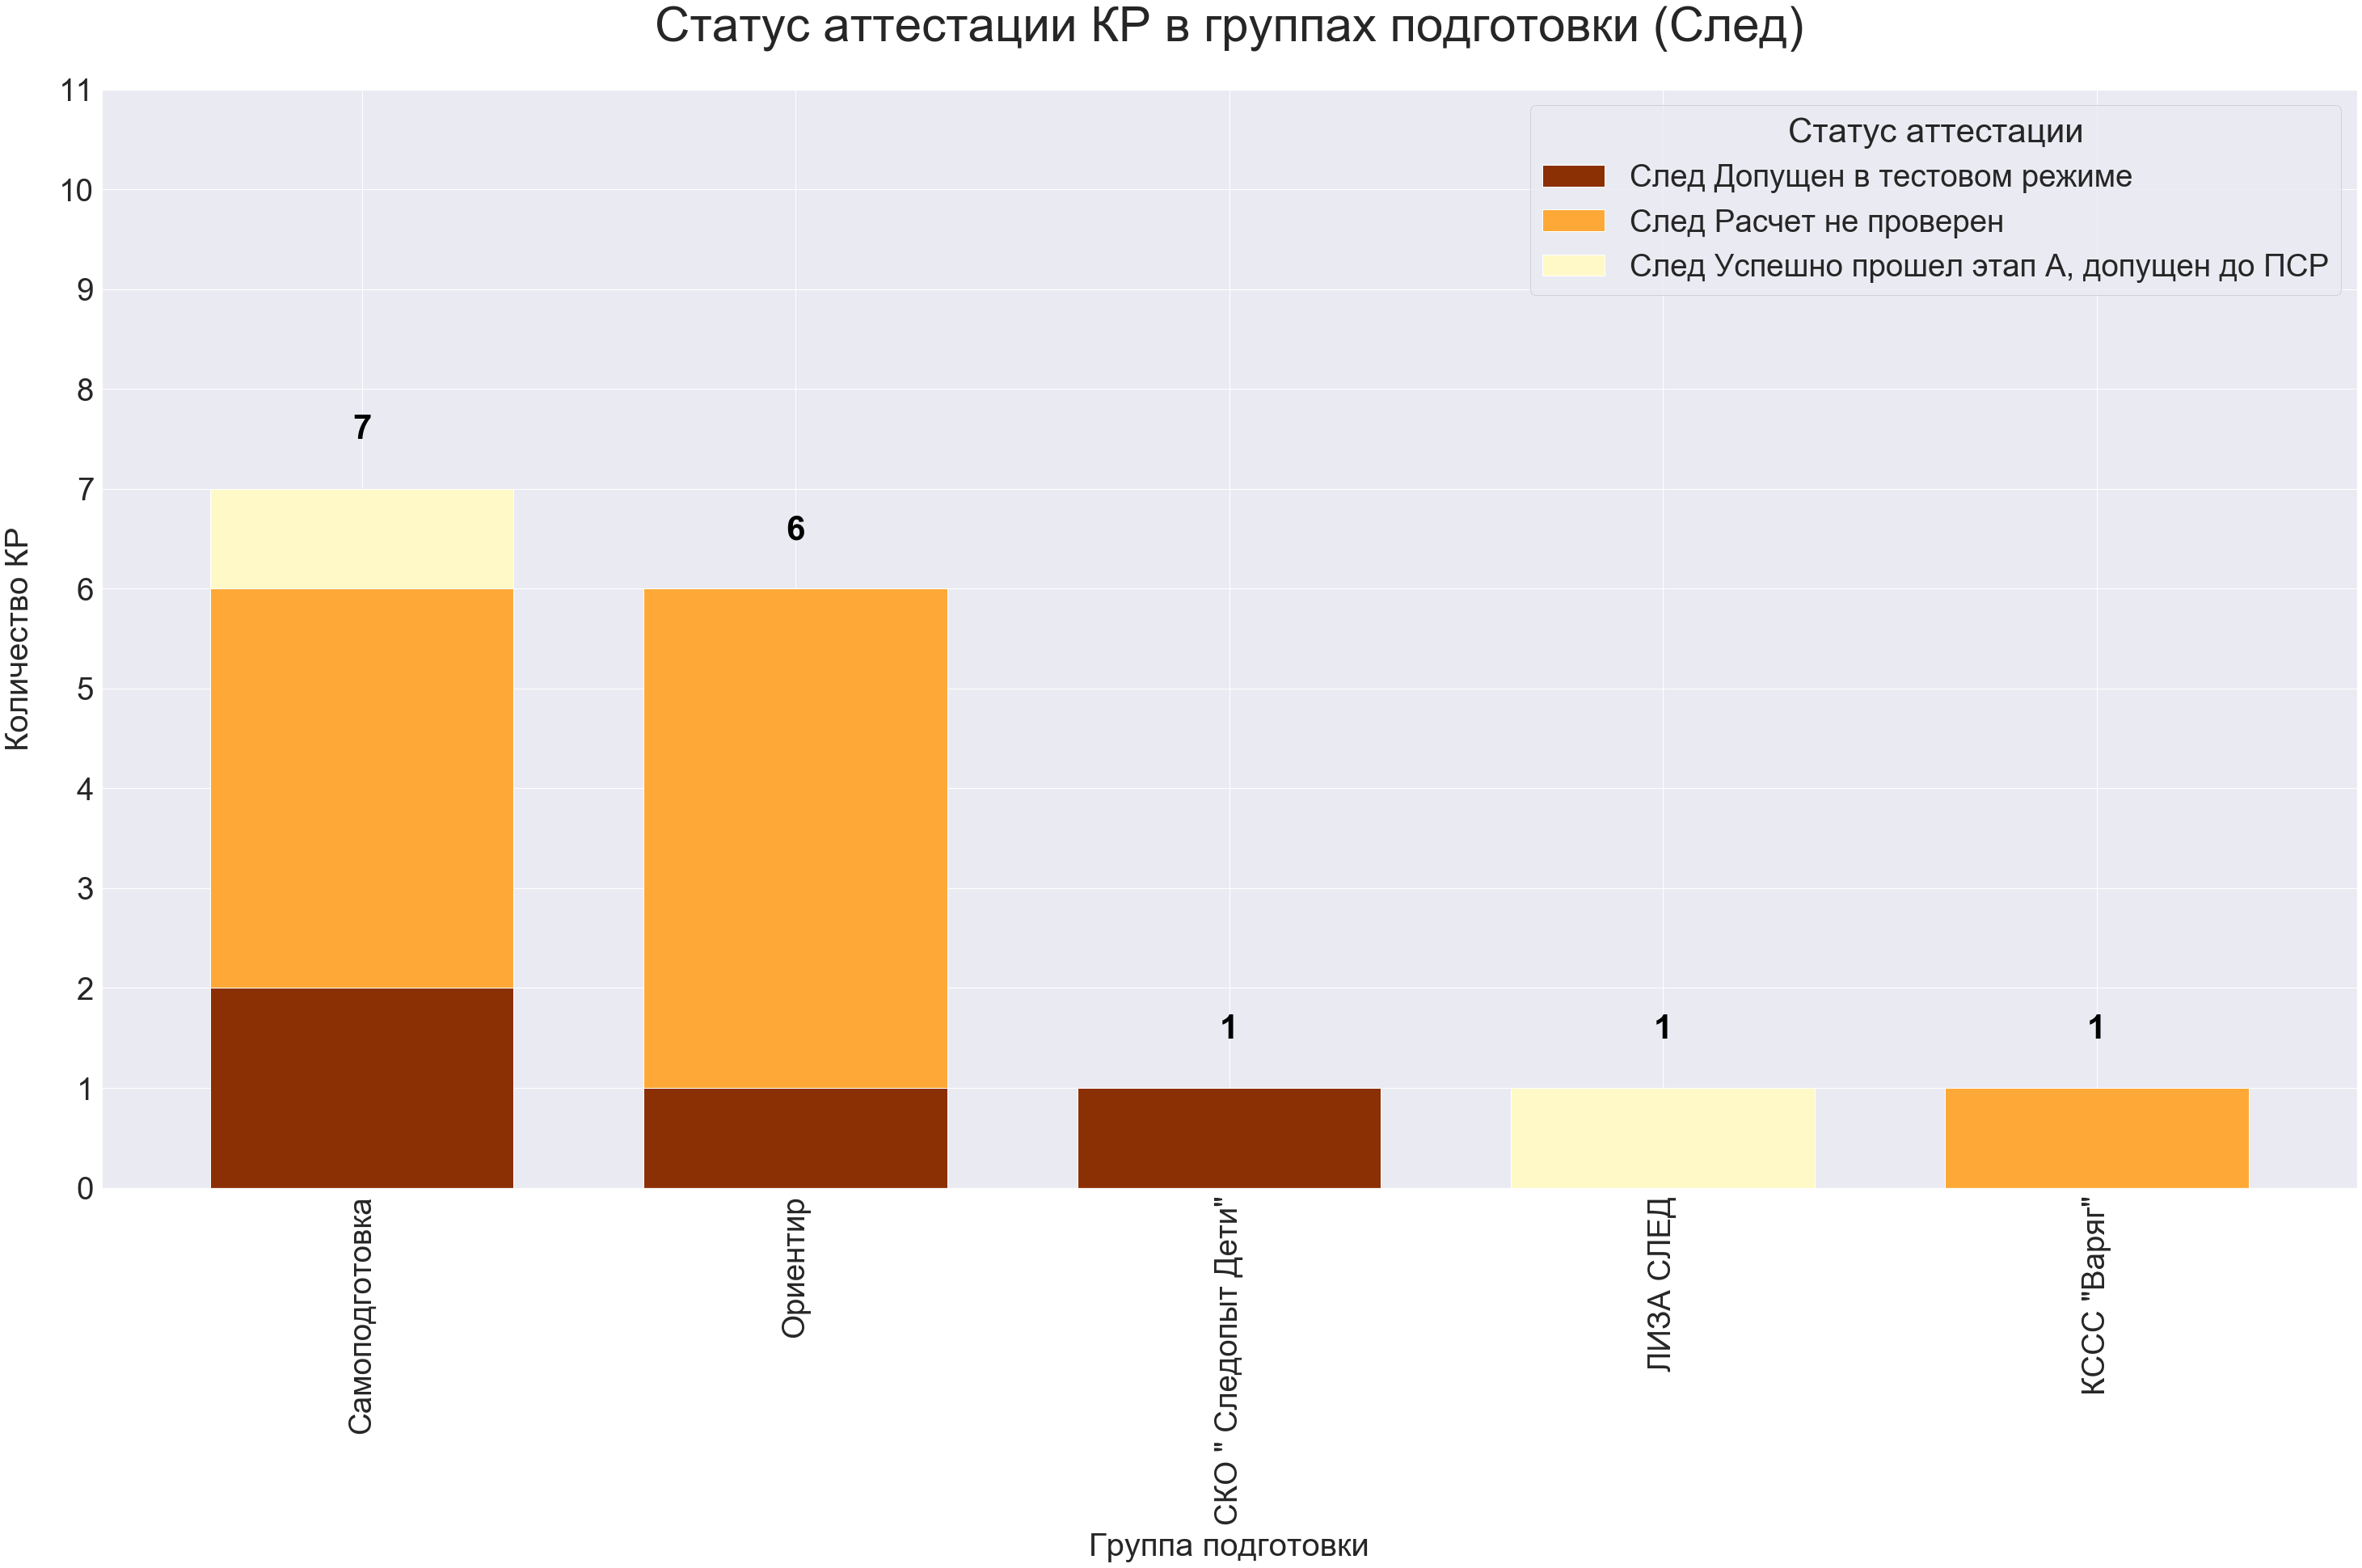

In [88]:
sns.set(font_scale = 3.5)

bars = ddf_kinologist_groups_att_msc_sled_.T.plot(kind='bar', width = 0.7, stacked=True,
          colormap=ListedColormap(sns.color_palette("YlOrBr_r", 10)), 
          figsize=(50,25))

# Add labels to each bar.
for i, tot in enumerate(totals):
    bars.text(i, tot + 0.5, round(tot),
          ha = 'center', weight = 'bold', color = 'black')

bars.axes.set_title('Статус аттестации КР в группах подготовки (След)', fontsize=60, y = 1.04) 

bars.set_xlabel('Группа подготовки', fontsize=40, labelpad = 10) #название оси Х

bars.set_ylabel('Количество КР', fontsize=40, labelpad = 30) #название оси Y

plt.xticks(rotation=90) #поворот значений по оси Х

plt.yticks(range(0,12,1))

plt.show() #показываем диаграмму

В следовом направлении в активных группах насчитывается 16 КР, из которых 2 КР допущены в тестовом режиме и 2 КР успешно прошли этап А и допущены до ПСР.
